In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

import tensorflow as tf

import pixiedust
from functools import partial
import gin
import itertools
import multiprocessing
import pickle

from synthetic_data import xs_e, ys_e, Q1, xs, ys, A

# Import dependencies
import plotly
import plotly.graph_objs as go

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

Pixiedust database opened successfully


In [2]:
xs_e.shape

(1000, 4)

In [3]:
# hyperparameters setup
common = {
    'build_decoder_model.init_fp_dist': None,
    'build_feature_model.init_fp_dist': None,
    'build_reconstructor_model.init_fp_dist': None,
    'step.l_rec_coeff': 5,
    'get_results.epochs': 1000,
    'get_results.batch_size': 64,
    'get_results.optimizer': tf.keras.optimizers.Adam(lr=0.001),
}

sweep_00 = {
    'step.l_rec_coeff': [1, 10],
    'get_results.batch_size': [256, 512],
    'repetitions': range(2),
    'name': ['sweep-00'],
}

sweep_01 = {
    'step.l_rec_coeff': np.logspace(-2, 2, 10),
    'get_results.batch_size': [64, 128, 256, 512],
    'repetitions': range(5),
    'name': ['sweep-01'],
}

# number of processes
n_cpus = 5

sweep = sweep_01
assert 'name' in sweep
assert 'repetitions' in sweep
assert len(sweep['name']) == 1

In [4]:
# all parameters as a list
all_params = list(itertools.product(*[[(x, z) for z in y] for x, y in sweep.items()]))
all_params = [dict(t) for t in all_params]
print("Total runs: %d on %d CPUs" % (len(all_params), n_cpus))

Total runs: 200 on 5 CPUs


In [5]:
def set_params(param):
    """Set params via gin."""
    # binding common params
    for k, v in common.items():
        gin.bind_parameter(k, v)
    
    for k, v in param.items():
        if k == 'repetitions' or k == 'name': continue
        gin.bind_parameter(k, v)

def process_i(i):
    """Process i'th parameter."""
    param = all_params[i]
    print(i, param)
    from synthetic_experiment import get_results
    
    set_params(param)
    
    return get_results(xs_e, ys_e, Q1)

In [ ]:
# RUNNING the experiment
pool = multiprocessing.Pool(n_cpus)
results = pool.map(process_i, range(len(all_params)))

20 {'step.l_rec_coeff': 0.027825594022071243, 'get_results.batch_size': 64, 'repetitions': 0, 'name': 'sweep-01'}
40 {'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 64, 'repetitions': 0, 'name': 'sweep-01'}
0 {'step.l_rec_coeff': 0.01, 'get_results.batch_size': 64, 'repetitions': 0, 'name': 'sweep-01'}
10 {'step.l_rec_coeff': 0.01, 'get_results.batch_size': 256, 'repetitions': 0, 'name': 'sweep-01'}
30 {'step.l_rec_coeff': 0.027825594022071243, 'get_results.batch_size': 256, 'repetitions': 0, 'name': 'sweep-01'}




31 {'step.l_rec_coeff': 0.027825594022071243, 'get_results.batch_size': 256, 'repetitions': 1, 'name': 'sweep-01'}


11 {'step.l_rec_coeff': 0.01, 'get_results.batch_size': 256, 'repetitions': 1, 'name': 'sweep-01'}



32 {'step.l_rec_coeff': 0.027825594022071243, 'get_results.batch_size': 256, 'repetitions': 2, 'name': 'sweep-01'}



12 {'step.l_rec_coeff': 0.01, 'get_results.batch_size': 256, 'repetitions': 2, 'name': 'sweep-01'}



33 {'step.l_rec_coeff': 0.027825594022071243, 'get_results.batch_size': 256, 'repetitions': 3, 'name': 'sweep-01'}



13 {'step.l_rec_coeff': 0.01, 'get_results.batch_size': 256, 'repetitions': 3, 'name': 'sweep-01'}



34 {'step.l_rec_coeff': 0.027825594022071243, 'get_results.batch_size': 256, 'repetitions': 4, 'name': 'sweep-01'}



14 {'step.l_rec_coeff': 0.01, 'get_results.batch_size': 256, 'repetitions': 4, 'name': 'sweep-01'}




1 {'step.l_rec_coeff': 0.01, 'get_results.batch_size': 64, 'repetitions': 1, 'name': 'sweep-01'}
41 {'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 64, 'repetitions': 1, 'name': 'sweep-01'}



21 {'step.l_rec_coeff': 0.027825594022071243, 'get_results.batch_size': 64, 'repetitions': 1, 'name': 'sweep-01'}



35 {'step.l_rec_coeff': 0.027825594022071243, 'get_results.batch_size': 512, 'repetitions': 0, 'name': 'sweep-01'}



15 {'step.l_rec_coeff': 0.01, 'get_results.batch_size': 512, 'repetitions': 0, 'name': 'sweep-01'}



36 {'step.l_rec_coeff': 0.027825594022071243, 'get_results.batch_size': 512, 'repetitions': 1, 'name': 'sweep-01'}



16 {'step.l_rec_coeff': 0.01, 'get_results.batch_size': 512, 'repetitions': 1, 'name': 'sweep-01'}



37 {'step.l_rec_coeff': 0.027825594022071243, 'get_results.batch_size': 512, 'repetitions': 2, 'name': 'sweep-01'}



17 {'step.l_rec_coeff': 0.01, 'get_results.batch_size': 512, 'repetitions': 2, 'name': 'sweep-01'}



38 {'step.l_rec_coeff': 0.027825594022071243, 'get_results.batch_size': 512, 'repetitions': 3, 'name': 'sweep-01'}



18 {'step.l_rec_coeff': 0.01, 'get_results.batch_size': 512, 'repetitions': 3, 'name': 'sweep-01'}



39 {'step.l_rec_coeff': 0.027825594022071243, 'get_results.batch_size': 512, 'repetitions': 4, 'name': 'sweep-01'}



19 {'step.l_rec_coeff': 0.01, 'get_results.batch_size': 512, 'repetitions': 4, 'name': 'sweep-01'}



50 {'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 256, 'repetitions': 0, 'name': 'sweep-01'}



60 {'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 64, 'repetitions': 0, 'name': 'sweep-01'}



51 {'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 256, 'repetitions': 1, 'name': 'sweep-01'}



42 {'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 64, 'repetitions': 2, 'name': 'sweep-01'}



2 {'step.l_rec_coeff': 0.01, 'get_results.batch_size': 64, 'repetitions': 2, 'name': 'sweep-01'}



22 {'step.l_rec_coeff': 0.027825594022071243, 'get_results.batch_size': 64, 'repetitions': 2, 'name': 'sweep-01'}



52 {'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 256, 'repetitions': 2, 'name': 'sweep-01'}



53 {'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 256, 'repetitions': 3, 'name': 'sweep-01'}



54 {'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 256, 'repetitions': 4, 'name': 'sweep-01'}



61 {'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 64, 'repetitions': 1, 'name': 'sweep-01'}



55 {'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 512, 'repetitions': 0, 'name': 'sweep-01'}



56 {'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 512, 'repetitions': 1, 'name': 'sweep-01'}



57 {'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 512, 'repetitions': 2, 'name': 'sweep-01'}



58 {'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 512, 'repetitions': 3, 'name': 'sweep-01'}



43 {'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 64, 'repetitions': 3, 'name': 'sweep-01'}



3 {'step.l_rec_coeff': 0.01, 'get_results.batch_size': 64, 'repetitions': 3, 'name': 'sweep-01'}



23 {'step.l_rec_coeff': 0.027825594022071243, 'get_results.batch_size': 64, 'repetitions': 3, 'name': 'sweep-01'}



59 {'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 512, 'repetitions': 4, 'name': 'sweep-01'}



70 {'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 256, 'repetitions': 0, 'name': 'sweep-01'}



71 {'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 256, 'repetitions': 1, 'name': 'sweep-01'}



72 {'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 256, 'repetitions': 2, 'name': 'sweep-01'}



62 {'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 64, 'repetitions': 2, 'name': 'sweep-01'}



73 {'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 256, 'repetitions': 3, 'name': 'sweep-01'}



74 {'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 256, 'repetitions': 4, 'name': 'sweep-01'}



44 {'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 64, 'repetitions': 4, 'name': 'sweep-01'}



4 {'step.l_rec_coeff': 0.01, 'get_results.batch_size': 64, 'repetitions': 4, 'name': 'sweep-01'}



24 {'step.l_rec_coeff': 0.027825594022071243, 'get_results.batch_size': 64, 'repetitions': 4, 'name': 'sweep-01'}



75 {'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 512, 'repetitions': 0, 'name': 'sweep-01'}



76 {'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 512, 'repetitions': 1, 'name': 'sweep-01'}



77 {'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 512, 'repetitions': 2, 'name': 'sweep-01'}



78 {'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 512, 'repetitions': 3, 'name': 'sweep-01'}



79 {'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 512, 'repetitions': 4, 'name': 'sweep-01'}



63 {'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 64, 'repetitions': 3, 'name': 'sweep-01'}



80 {'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 64, 'repetitions': 0, 'name': 'sweep-01'}



45 {'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-01'}



5 {'step.l_rec_coeff': 0.01, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-01'}



25 {'step.l_rec_coeff': 0.027825594022071243, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-01'}



46 {'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-01'}



6 {'step.l_rec_coeff': 0.01, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-01'}



26 {'step.l_rec_coeff': 0.027825594022071243, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-01'}



64 {'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 64, 'repetitions': 4, 'name': 'sweep-01'}



81 {'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 64, 'repetitions': 1, 'name': 'sweep-01'}


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




65 {'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-01'}



82 {'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 64, 'repetitions': 2, 'name': 'sweep-01'}



49 {'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-01'}



9 {'step.l_rec_coeff': 0.01, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-01'}



29 {'step.l_rec_coeff': 0.027825594022071243, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-01'}



66 {'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-01'}



90 {'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 256, 'repetitions': 0, 'name': 'sweep-01'}



100 {'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 64, 'repetitions': 0, 'name': 'sweep-01'}



110 {'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 256, 'repetitions': 0, 'name': 'sweep-01'}



67 {'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-01'}



91 {'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 256, 'repetitions': 1, 'name': 'sweep-01'}



111 {'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 256, 'repetitions': 1, 'name': 'sweep-01'}



83 {'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 64, 'repetitions': 3, 'name': 'sweep-01'}



92 {'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 256, 'repetitions': 2, 'name': 'sweep-01'}



112 {'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 256, 'repetitions': 2, 'name': 'sweep-01'}



93 {'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 256, 'repetitions': 3, 'name': 'sweep-01'}



113 {'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 256, 'repetitions': 3, 'name': 'sweep-01'}



68 {'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-01'}



94 {'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 256, 'repetitions': 4, 'name': 'sweep-01'}



114 {'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 256, 'repetitions': 4, 'name': 'sweep-01'}



101 {'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 64, 'repetitions': 1, 'name': 'sweep-01'}



95 {'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 512, 'repetitions': 0, 'name': 'sweep-01'}



115 {'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 512, 'repetitions': 0, 'name': 'sweep-01'}



69 {'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-01'}



96 {'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 512, 'repetitions': 1, 'name': 'sweep-01'}



116 {'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 512, 'repetitions': 1, 'name': 'sweep-01'}



84 {'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 64, 'repetitions': 4, 'name': 'sweep-01'}



97 {'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 512, 'repetitions': 2, 'name': 'sweep-01'}



117 {'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 512, 'repetitions': 2, 'name': 'sweep-01'}



98 {'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 512, 'repetitions': 3, 'name': 'sweep-01'}



118 {'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 512, 'repetitions': 3, 'name': 'sweep-01'}



99 {'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 512, 'repetitions': 4, 'name': 'sweep-01'}



119 {'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 512, 'repetitions': 4, 'name': 'sweep-01'}



120 {'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 64, 'repetitions': 0, 'name': 'sweep-01'}



130 {'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 256, 'repetitions': 0, 'name': 'sweep-01'}



140 {'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 64, 'repetitions': 0, 'name': 'sweep-01'}



131 {'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 256, 'repetitions': 1, 'name': 'sweep-01'}



102 {'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 64, 'repetitions': 2, 'name': 'sweep-01'}



132 {'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 256, 'repetitions': 2, 'name': 'sweep-01'}



133 {'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 256, 'repetitions': 3, 'name': 'sweep-01'}



85 {'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-01'}



134 {'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 256, 'repetitions': 4, 'name': 'sweep-01'}



121 {'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 64, 'repetitions': 1, 'name': 'sweep-01'}



141 {'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 64, 'repetitions': 1, 'name': 'sweep-01'}



135 {'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 512, 'repetitions': 0, 'name': 'sweep-01'}



86 {'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-01'}



136 {'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 512, 'repetitions': 1, 'name': 'sweep-01'}



137 {'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 512, 'repetitions': 2, 'name': 'sweep-01'}



138 {'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 512, 'repetitions': 3, 'name': 'sweep-01'}



103 {'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 64, 'repetitions': 3, 'name': 'sweep-01'}



139 {'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 512, 'repetitions': 4, 'name': 'sweep-01'}



150 {'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 256, 'repetitions': 0, 'name': 'sweep-01'}



87 {'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-01'}



151 {'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 256, 'repetitions': 1, 'name': 'sweep-01'}



152 {'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 256, 'repetitions': 2, 'name': 'sweep-01'}



122 {'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 64, 'repetitions': 2, 'name': 'sweep-01'}



142 {'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 64, 'repetitions': 2, 'name': 'sweep-01'}



88 {'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-01'}



153 {'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 256, 'repetitions': 3, 'name': 'sweep-01'}



104 {'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 64, 'repetitions': 4, 'name': 'sweep-01'}



154 {'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 256, 'repetitions': 4, 'name': 'sweep-01'}



89 {'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-01'}



155 {'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 512, 'repetitions': 0, 'name': 'sweep-01'}



156 {'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 512, 'repetitions': 1, 'name': 'sweep-01'}



157 {'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 512, 'repetitions': 2, 'name': 'sweep-01'}



158 {'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 512, 'repetitions': 3, 'name': 'sweep-01'}



123 {'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 64, 'repetitions': 3, 'name': 'sweep-01'}



159 {'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 512, 'repetitions': 4, 'name': 'sweep-01'}



143 {'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 64, 'repetitions': 3, 'name': 'sweep-01'}



160 {'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 64, 'repetitions': 0, 'name': 'sweep-01'}



170 {'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 256, 'repetitions': 0, 'name': 'sweep-01'}



171 {'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 256, 'repetitions': 1, 'name': 'sweep-01'}



105 {'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-01'}



172 {'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 256, 'repetitions': 2, 'name': 'sweep-01'}



173 {'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 256, 'repetitions': 3, 'name': 'sweep-01'}



106 {'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-01'}



174 {'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 256, 'repetitions': 4, 'name': 'sweep-01'}



124 {'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 64, 'repetitions': 4, 'name': 'sweep-01'}



144 {'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 64, 'repetitions': 4, 'name': 'sweep-01'}



161 {'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 64, 'repetitions': 1, 'name': 'sweep-01'}



175 {'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 512, 'repetitions': 0, 'name': 'sweep-01'}



176 {'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 512, 'repetitions': 1, 'name': 'sweep-01'}



107 {'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-01'}



177 {'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 512, 'repetitions': 2, 'name': 'sweep-01'}



178 {'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 512, 'repetitions': 3, 'name': 'sweep-01'}



179 {'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 512, 'repetitions': 4, 'name': 'sweep-01'}



180 {'step.l_rec_coeff': 100.0, 'get_results.batch_size': 64, 'repetitions': 0, 'name': 'sweep-01'}



108 {'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-01'}



125 {'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-01'}



145 {'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-01'}



162 {'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 64, 'repetitions': 2, 'name': 'sweep-01'}



109 {'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-01'}



126 {'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-01'}



146 {'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-01'}



181 {'step.l_rec_coeff': 100.0, 'get_results.batch_size': 64, 'repetitions': 1, 'name': 'sweep-01'}



190 {'step.l_rec_coeff': 100.0, 'get_results.batch_size': 256, 'repetitions': 0, 'name': 'sweep-01'}



127 {'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-01'}



191 {'step.l_rec_coeff': 100.0, 'get_results.batch_size': 256, 'repetitions': 1, 'name': 'sweep-01'}



147 {'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-01'}



163 {'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 64, 'repetitions': 3, 'name': 'sweep-01'}



192 {'step.l_rec_coeff': 100.0, 'get_results.batch_size': 256, 'repetitions': 2, 'name': 'sweep-01'}



128 {'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-01'}



193 {'step.l_rec_coeff': 100.0, 'get_results.batch_size': 256, 'repetitions': 3, 'name': 'sweep-01'}



148 {'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-01'}



182 {'step.l_rec_coeff': 100.0, 'get_results.batch_size': 64, 'repetitions': 2, 'name': 'sweep-01'}



194 {'step.l_rec_coeff': 100.0, 'get_results.batch_size': 256, 'repetitions': 4, 'name': 'sweep-01'}



195 {'step.l_rec_coeff': 100.0, 'get_results.batch_size': 512, 'repetitions': 0, 'name': 'sweep-01'}



129 {'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-01'}



196 {'step.l_rec_coeff': 100.0, 'get_results.batch_size': 512, 'repetitions': 1, 'name': 'sweep-01'}



149 {'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-01'}



197 {'step.l_rec_coeff': 100.0, 'get_results.batch_size': 512, 'repetitions': 2, 'name': 'sweep-01'}



164 {'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 64, 'repetitions': 4, 'name': 'sweep-01'}



198 {'step.l_rec_coeff': 100.0, 'get_results.batch_size': 512, 'repetitions': 3, 'name': 'sweep-01'}



199 {'step.l_rec_coeff': 100.0, 'get_results.batch_size': 512, 'repetitions': 4, 'name': 'sweep-01'}






183 {'step.l_rec_coeff': 100.0, 'get_results.batch_size': 64, 'repetitions': 3, 'name': 'sweep-01'}



165 {'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-01'}



166 {'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-01'}



184 {'step.l_rec_coeff': 100.0, 'get_results.batch_size': 64, 'repetitions': 4, 'name': 'sweep-01'}



167 {'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-01'}



168 {'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-01'}



185 {'step.l_rec_coeff': 100.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-01'}



169 {'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-01'}



186 {'step.l_rec_coeff': 100.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-01'}




187 {'step.l_rec_coeff': 100.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-01'}



188 {'step.l_rec_coeff': 100.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-01'}


In [ ]:
def process_results(res, name):
    """Process experimental results."""
    print(name)
    losses, distances, weights = res
    # Plotting everything
    fig = plt.figure(figsize=(9, 4))
    fig.patch.set_facecolor('lightgreen')

    N_plots = len(losses) + 1

    plt.subplot(1, N_plots, 1)
    plt.title("d(M, A)")
    plt.plot(distances, color='red')
    plt.axhline(0, ls='--', c='black')

    colormap = ['green', 'blue']

    # model losses
    for i, key in enumerate(losses.keys()):
        plt.subplot(1, N_plots, 2 + i)
        plt.title(key)
        plt.plot(losses[key], c=colormap[i])
        plt.axhline(0, ls='--', c='black')

    #plt.legend()
    plt.show()

In [ ]:
param_1 = 'step.l_rec_coeff'
param_2 = 'get_results.batch_size'
assert param_1 in sweep and param_2 in sweep
lst_of_params = list(sweep.keys())
lst_of_params.remove(param_1)
lst_of_params.remove(param_2)
lst_of_params.remove('name')
print("Averaging over %s" % str(lst_of_params))

In [22]:
def filter_results(**kwargs):
    """Get results corresponding to constraints."""
    result = []
    for p, r in zip(all_params, results):
        include = True
        for k, v in kwargs.items():
            if p[k] != v: include = False
        if include:
            result.append((p, r))
    return result

{'step.l_rec_coeff': 0.027825594022071243, 'get_results.batch_size': 512, 'repetitions': 1, 'name': 'sweep-01'}


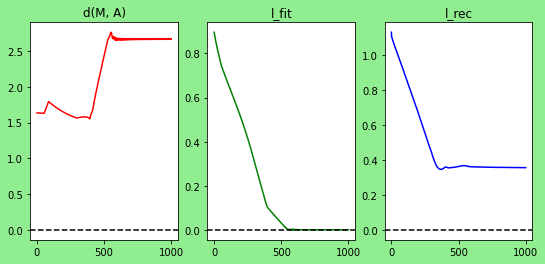

{'step.l_rec_coeff': 0.027825594022071243, 'get_results.batch_size': 512, 'repetitions': 2, 'name': 'sweep-01'}


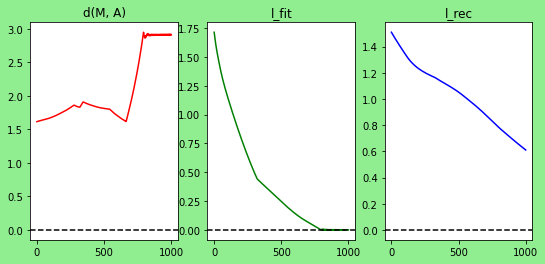

{'step.l_rec_coeff': 0.027825594022071243, 'get_results.batch_size': 512, 'repetitions': 3, 'name': 'sweep-01'}


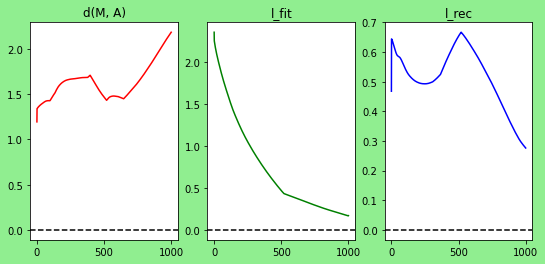

{'step.l_rec_coeff': 0.027825594022071243, 'get_results.batch_size': 512, 'repetitions': 4, 'name': 'sweep-01'}


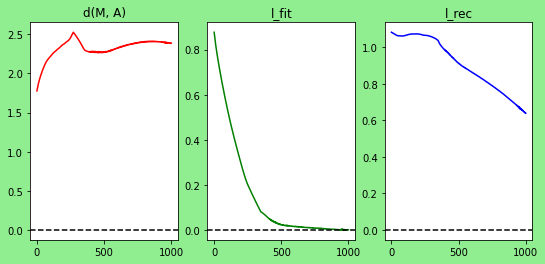

{'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 64, 'repetitions': 0, 'name': 'sweep-01'}


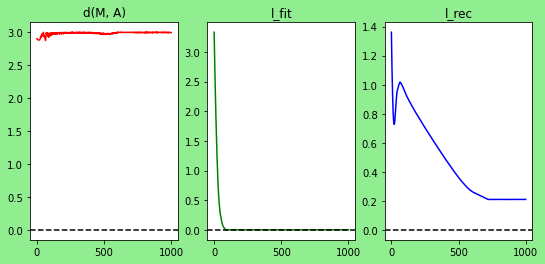

{'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 64, 'repetitions': 1, 'name': 'sweep-01'}


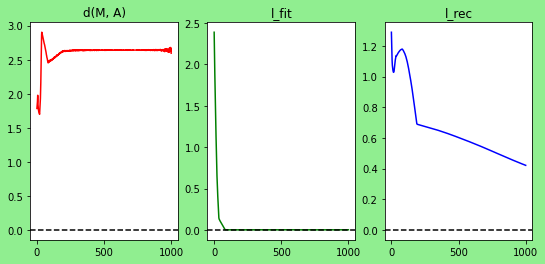

{'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 64, 'repetitions': 2, 'name': 'sweep-01'}


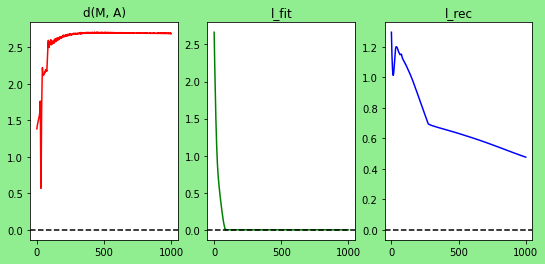

{'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 64, 'repetitions': 3, 'name': 'sweep-01'}


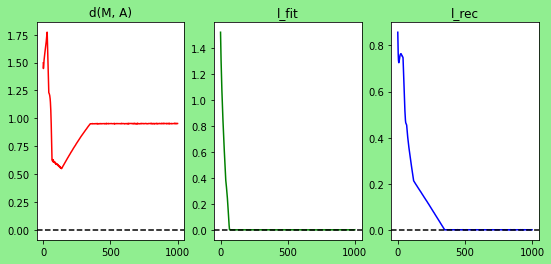

{'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 64, 'repetitions': 4, 'name': 'sweep-01'}


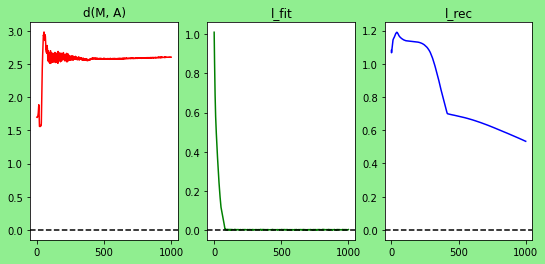

{'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-01'}


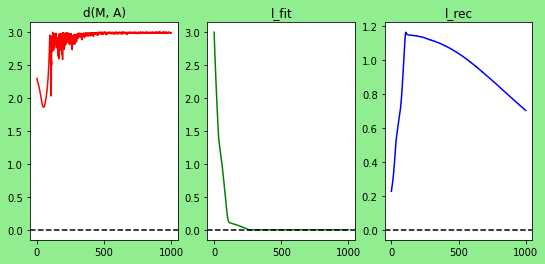

{'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-01'}


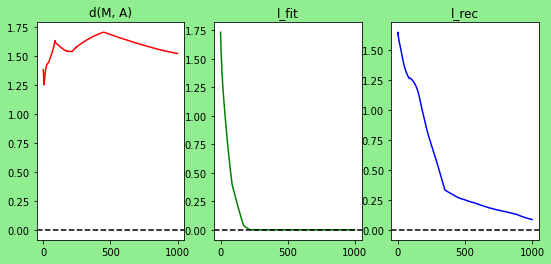

{'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-01'}


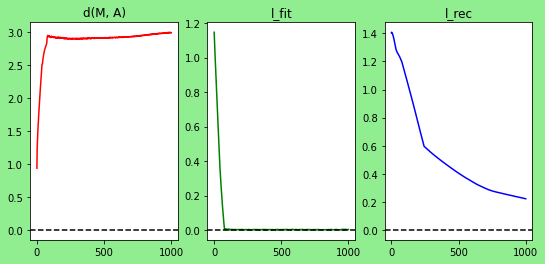

{'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-01'}


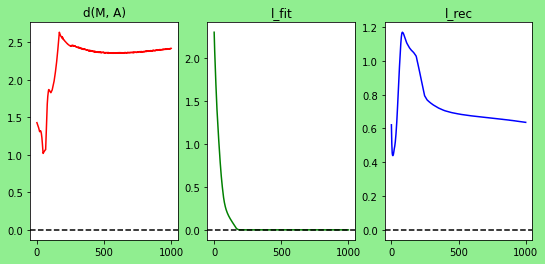

{'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-01'}


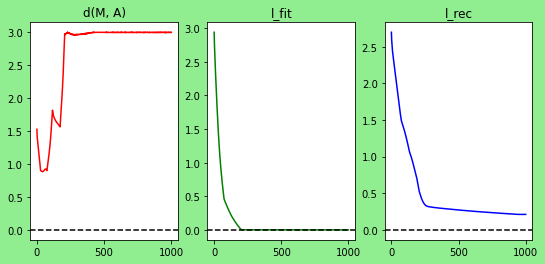

{'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 256, 'repetitions': 0, 'name': 'sweep-01'}


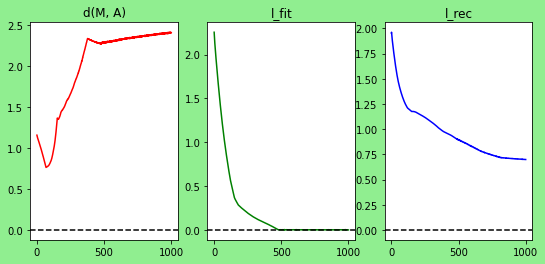

{'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 256, 'repetitions': 1, 'name': 'sweep-01'}


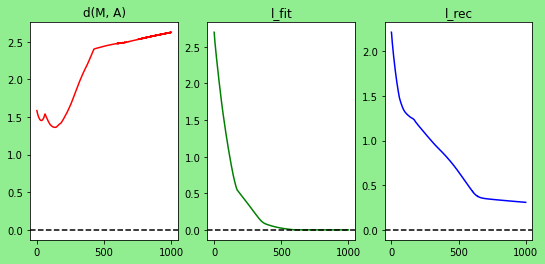

{'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 256, 'repetitions': 2, 'name': 'sweep-01'}


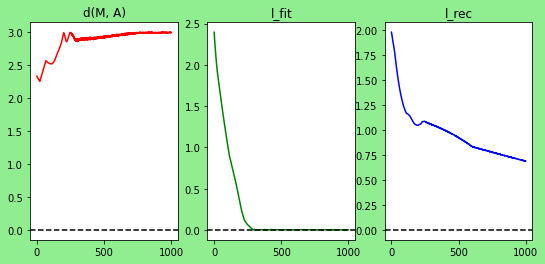

{'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 256, 'repetitions': 3, 'name': 'sweep-01'}


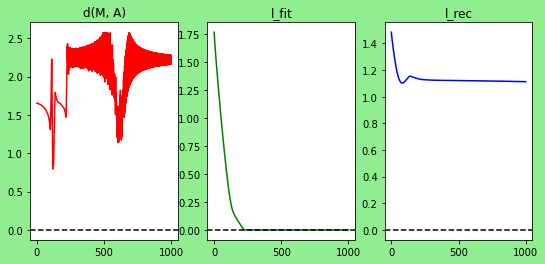

{'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 256, 'repetitions': 4, 'name': 'sweep-01'}


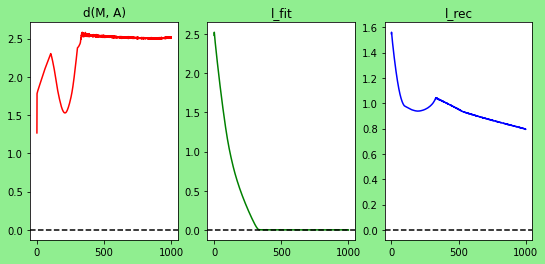

{'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 512, 'repetitions': 0, 'name': 'sweep-01'}


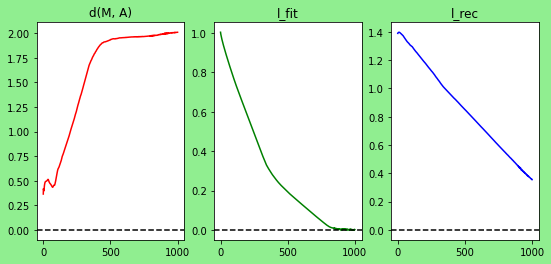

{'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 512, 'repetitions': 1, 'name': 'sweep-01'}


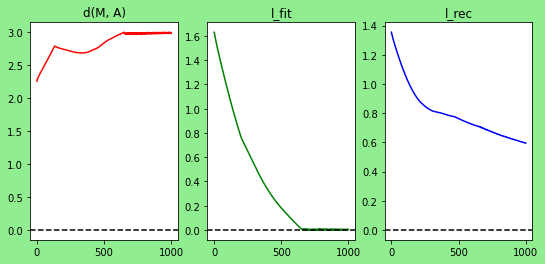

{'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 512, 'repetitions': 2, 'name': 'sweep-01'}


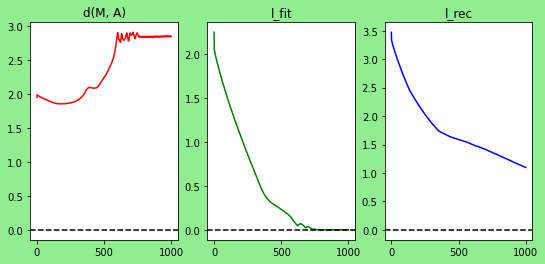

{'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 512, 'repetitions': 3, 'name': 'sweep-01'}


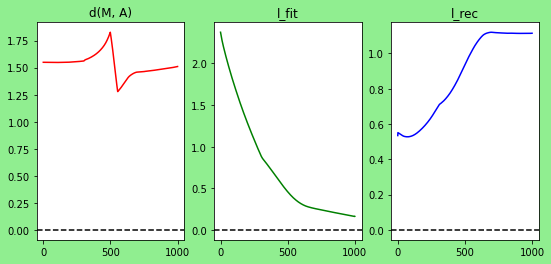

{'step.l_rec_coeff': 0.0774263682681127, 'get_results.batch_size': 512, 'repetitions': 4, 'name': 'sweep-01'}


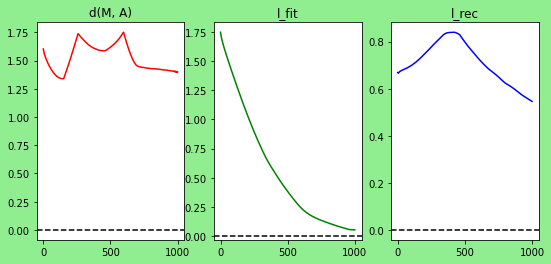

{'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 64, 'repetitions': 0, 'name': 'sweep-01'}


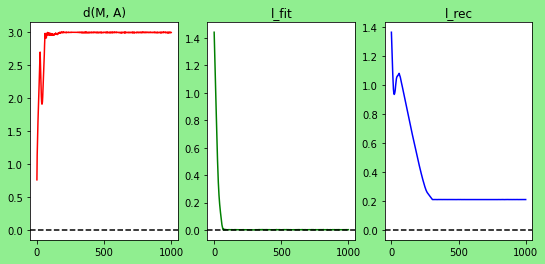

{'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 64, 'repetitions': 1, 'name': 'sweep-01'}


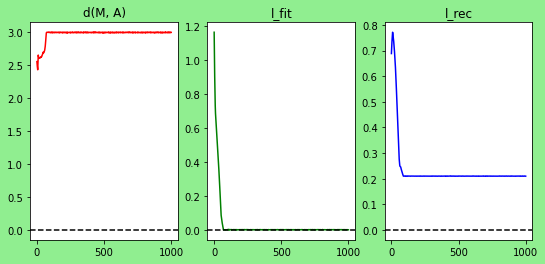

{'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 64, 'repetitions': 2, 'name': 'sweep-01'}


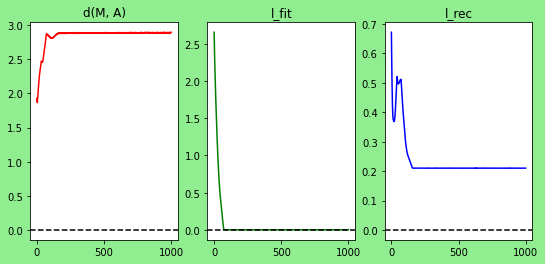

{'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 64, 'repetitions': 3, 'name': 'sweep-01'}


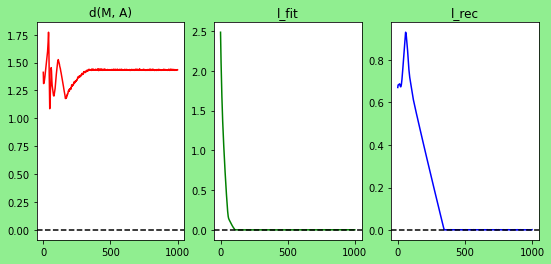

{'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 64, 'repetitions': 4, 'name': 'sweep-01'}


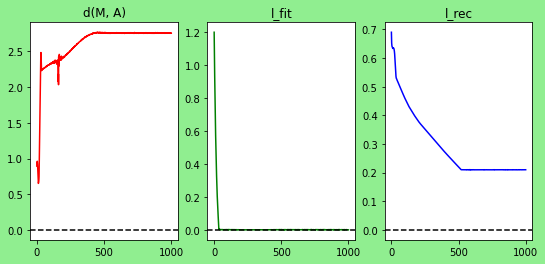

{'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-01'}


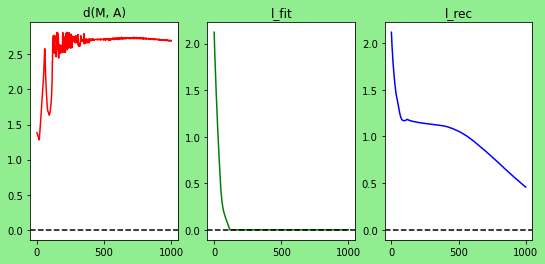

{'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-01'}


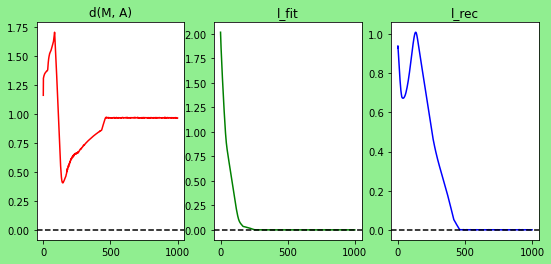

{'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-01'}


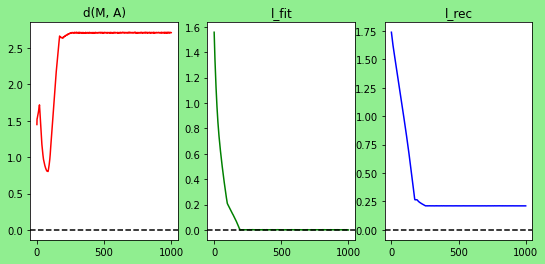

{'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-01'}


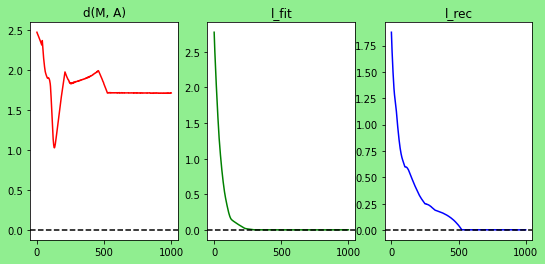

{'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-01'}


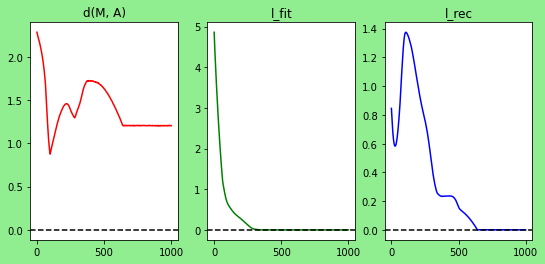

{'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 256, 'repetitions': 0, 'name': 'sweep-01'}


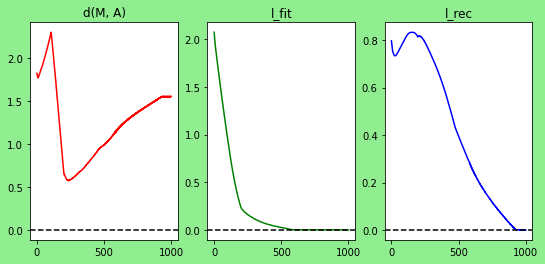

{'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 256, 'repetitions': 1, 'name': 'sweep-01'}


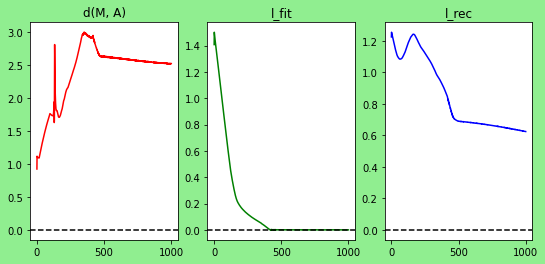

{'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 256, 'repetitions': 2, 'name': 'sweep-01'}


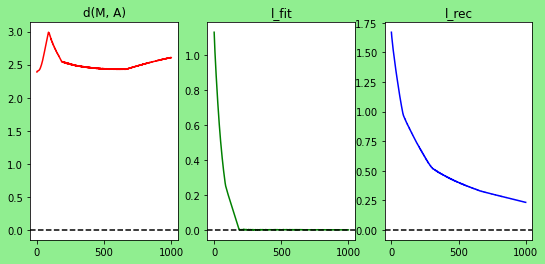

{'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 256, 'repetitions': 3, 'name': 'sweep-01'}


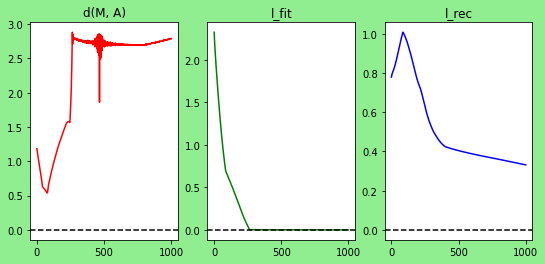

{'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 256, 'repetitions': 4, 'name': 'sweep-01'}


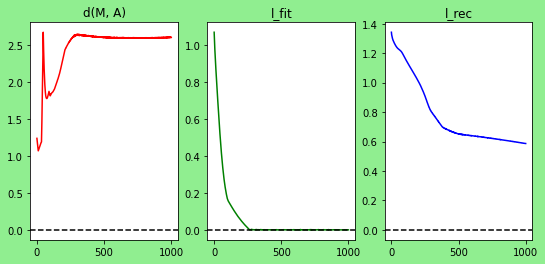

{'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 512, 'repetitions': 0, 'name': 'sweep-01'}


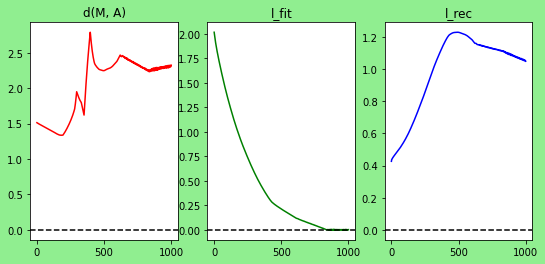

{'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 512, 'repetitions': 1, 'name': 'sweep-01'}


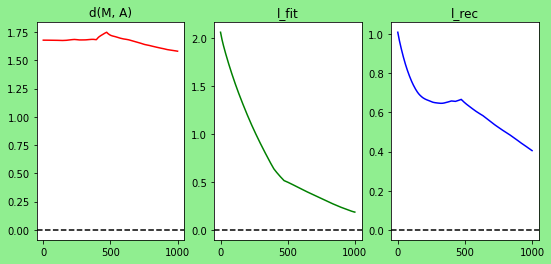

{'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 512, 'repetitions': 2, 'name': 'sweep-01'}


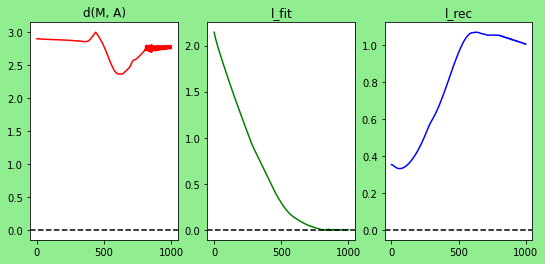

{'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 512, 'repetitions': 3, 'name': 'sweep-01'}


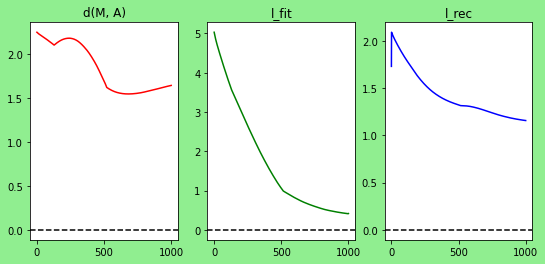

{'step.l_rec_coeff': 0.21544346900318834, 'get_results.batch_size': 512, 'repetitions': 4, 'name': 'sweep-01'}


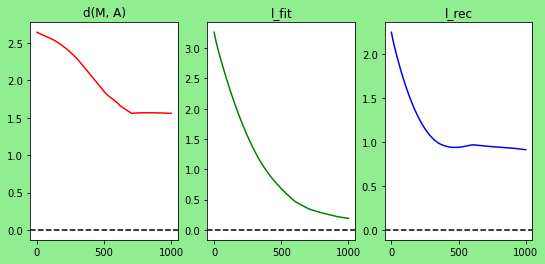

{'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 64, 'repetitions': 0, 'name': 'sweep-01'}


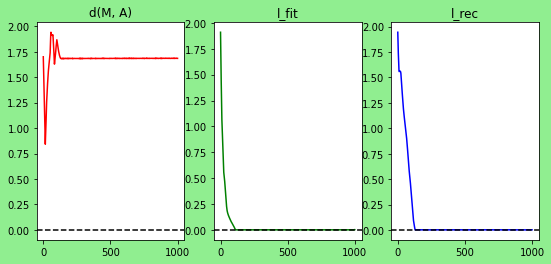

{'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 64, 'repetitions': 1, 'name': 'sweep-01'}


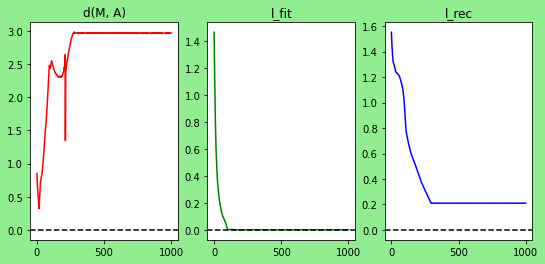

{'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 64, 'repetitions': 2, 'name': 'sweep-01'}


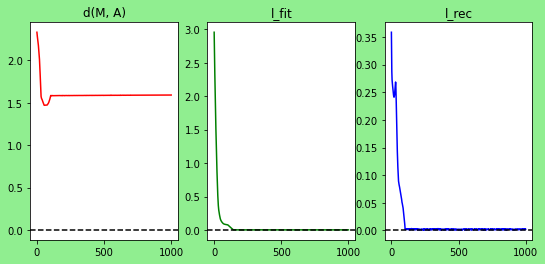

{'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 64, 'repetitions': 3, 'name': 'sweep-01'}


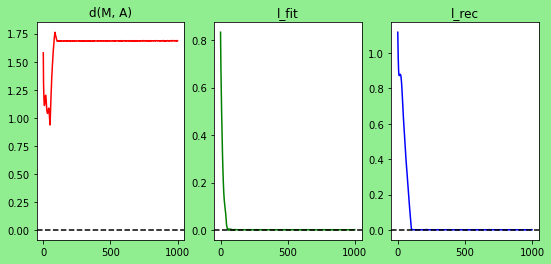

{'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 64, 'repetitions': 4, 'name': 'sweep-01'}


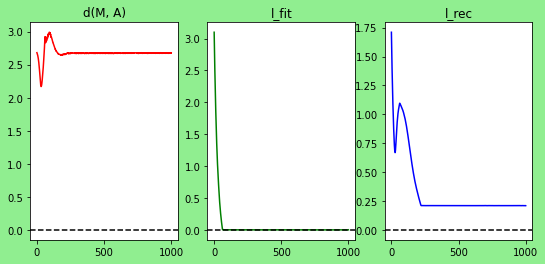

{'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-01'}


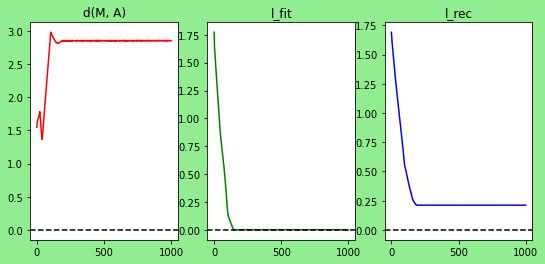

{'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-01'}


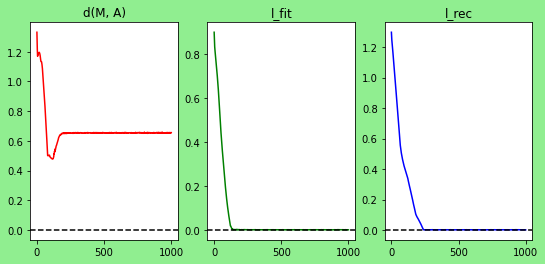

{'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-01'}


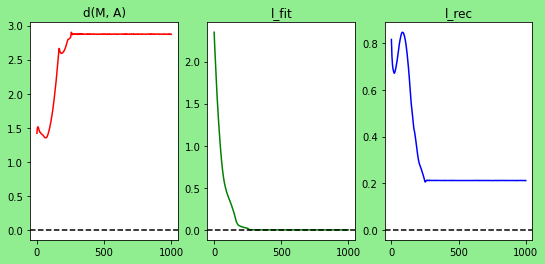

{'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-01'}


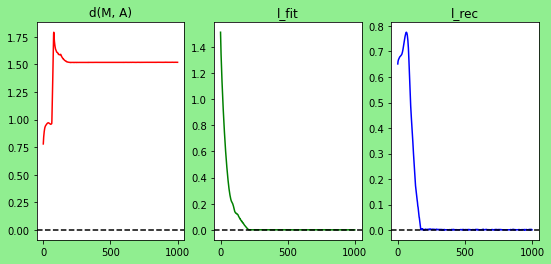

{'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-01'}


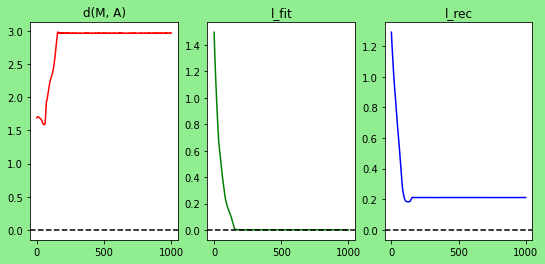

{'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 256, 'repetitions': 0, 'name': 'sweep-01'}


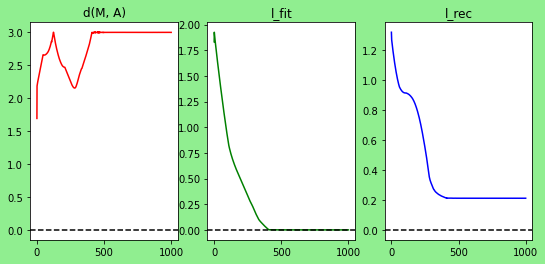

{'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 256, 'repetitions': 1, 'name': 'sweep-01'}


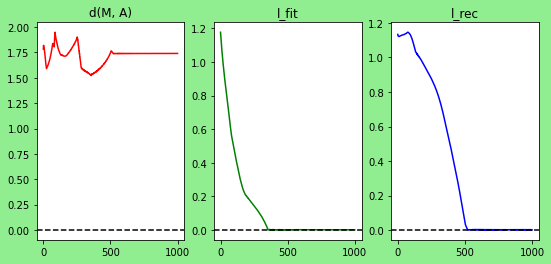

{'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 256, 'repetitions': 2, 'name': 'sweep-01'}


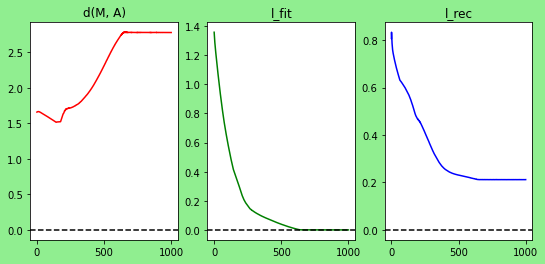

{'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 256, 'repetitions': 3, 'name': 'sweep-01'}


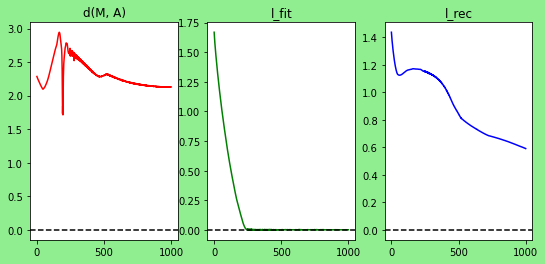

{'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 256, 'repetitions': 4, 'name': 'sweep-01'}


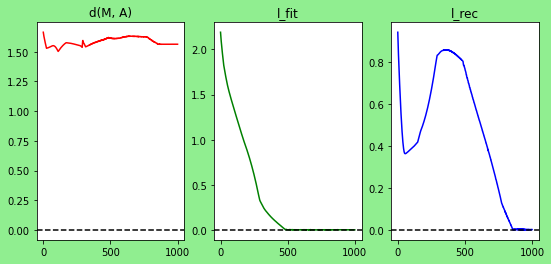

{'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 512, 'repetitions': 0, 'name': 'sweep-01'}


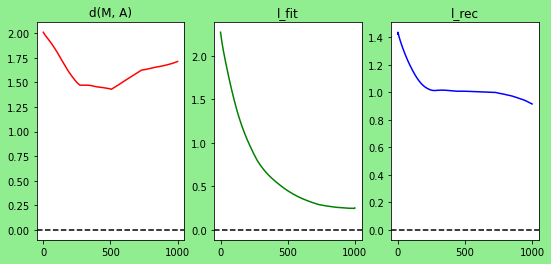

{'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 512, 'repetitions': 1, 'name': 'sweep-01'}


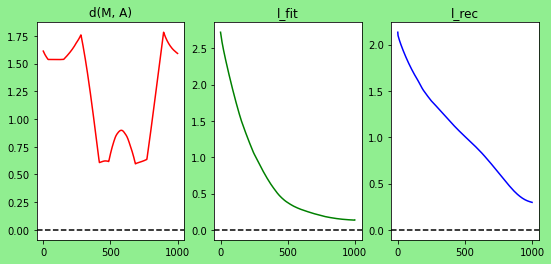

{'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 512, 'repetitions': 2, 'name': 'sweep-01'}


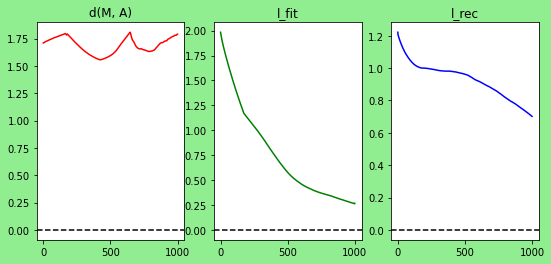

{'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 512, 'repetitions': 3, 'name': 'sweep-01'}


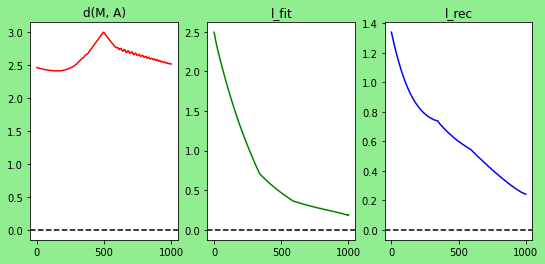

{'step.l_rec_coeff': 0.5994842503189409, 'get_results.batch_size': 512, 'repetitions': 4, 'name': 'sweep-01'}


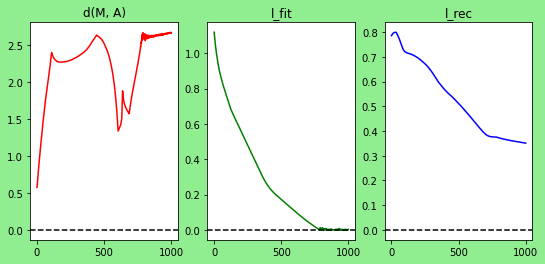

{'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 64, 'repetitions': 0, 'name': 'sweep-01'}


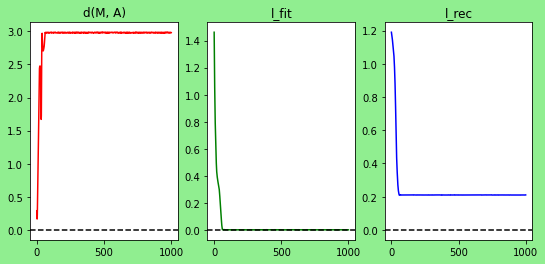

{'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 64, 'repetitions': 1, 'name': 'sweep-01'}


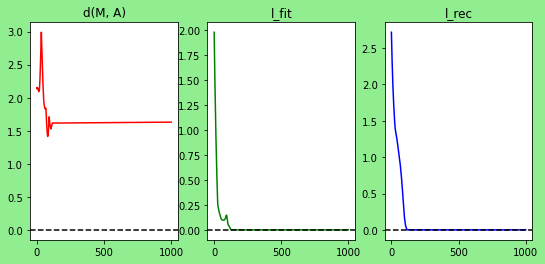

{'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 64, 'repetitions': 2, 'name': 'sweep-01'}


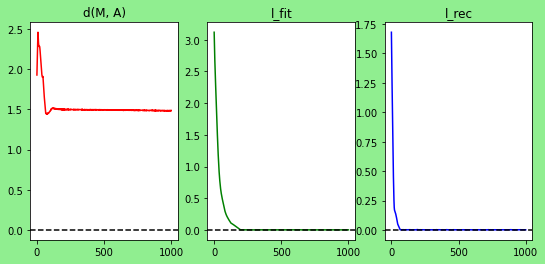

{'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 64, 'repetitions': 3, 'name': 'sweep-01'}


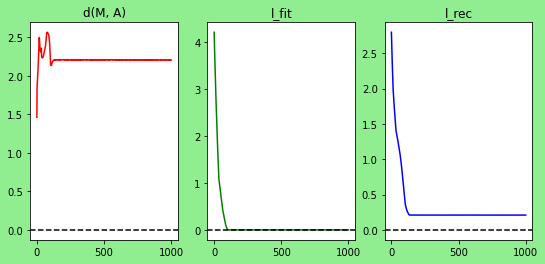

{'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 64, 'repetitions': 4, 'name': 'sweep-01'}


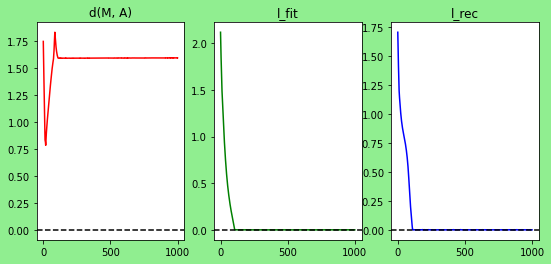

{'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-01'}


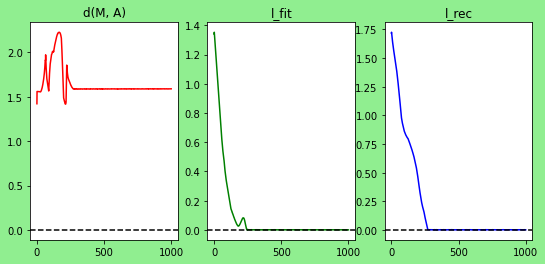

{'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-01'}


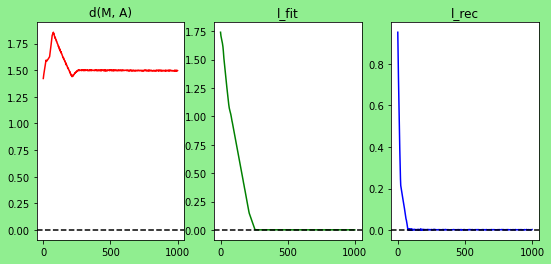

{'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-01'}


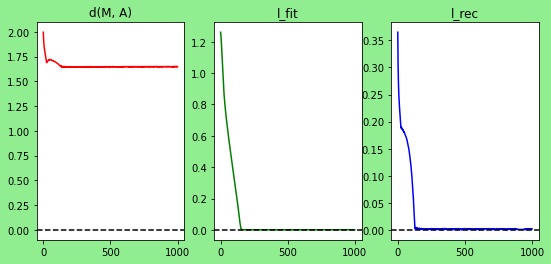

{'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-01'}


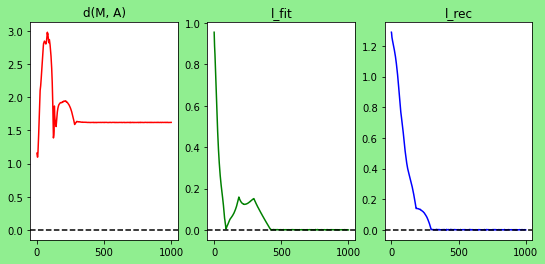

{'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-01'}


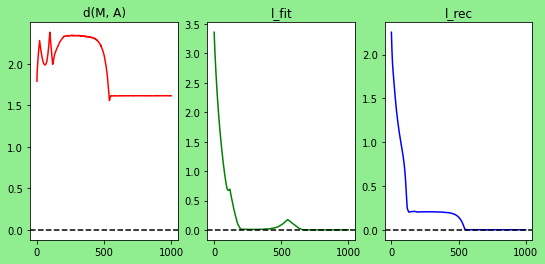

{'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 256, 'repetitions': 0, 'name': 'sweep-01'}


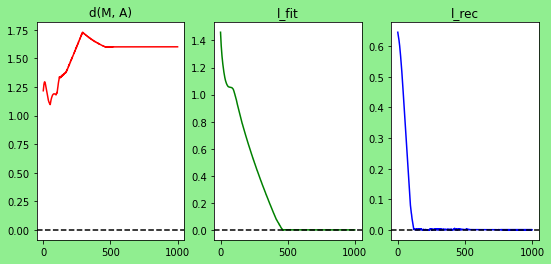

{'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 256, 'repetitions': 1, 'name': 'sweep-01'}


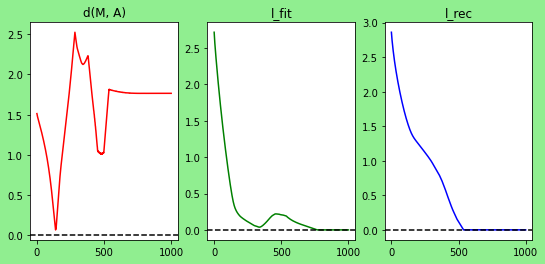

{'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 256, 'repetitions': 2, 'name': 'sweep-01'}


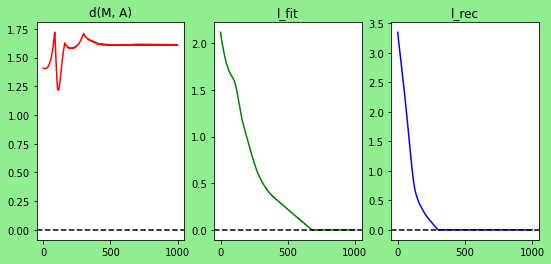

{'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 256, 'repetitions': 3, 'name': 'sweep-01'}


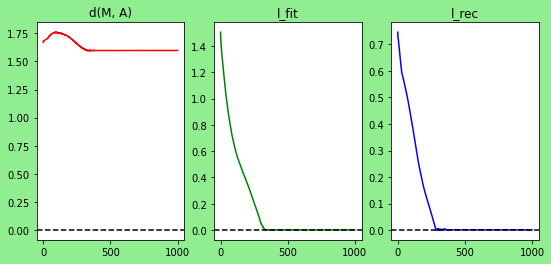

{'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 256, 'repetitions': 4, 'name': 'sweep-01'}


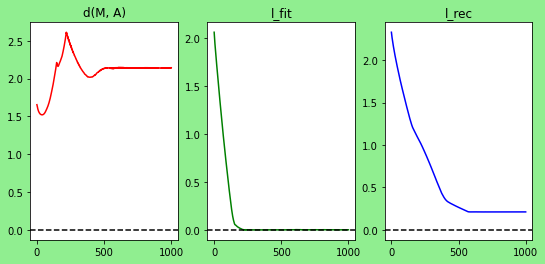

{'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 512, 'repetitions': 0, 'name': 'sweep-01'}


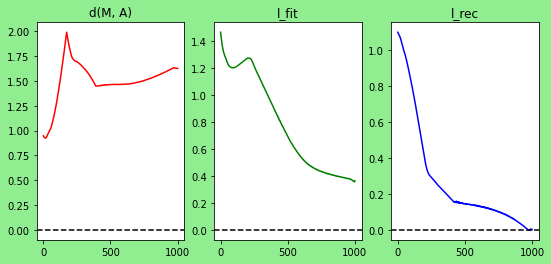

{'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 512, 'repetitions': 1, 'name': 'sweep-01'}


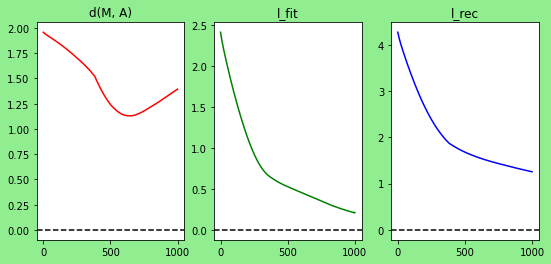

{'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 512, 'repetitions': 2, 'name': 'sweep-01'}


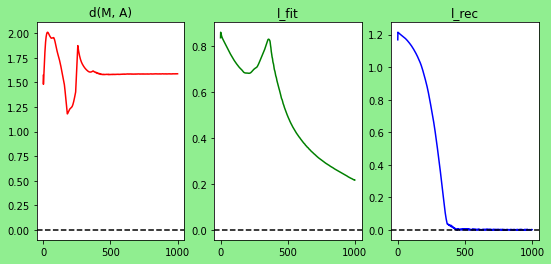

{'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 512, 'repetitions': 3, 'name': 'sweep-01'}


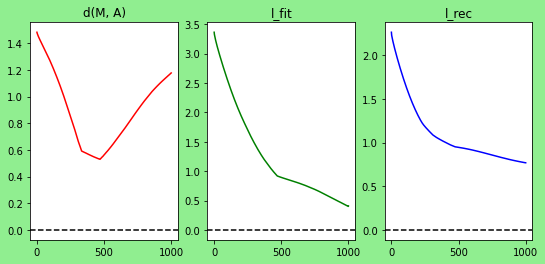

{'step.l_rec_coeff': 1.6681005372000592, 'get_results.batch_size': 512, 'repetitions': 4, 'name': 'sweep-01'}


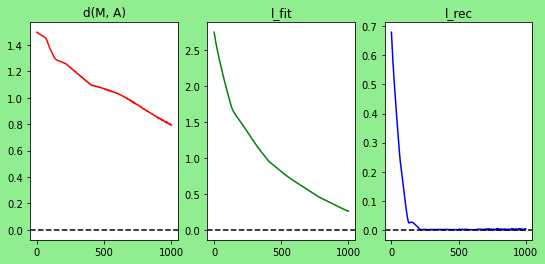

{'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 64, 'repetitions': 0, 'name': 'sweep-01'}


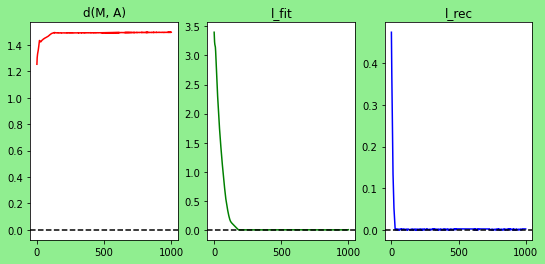

{'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 64, 'repetitions': 1, 'name': 'sweep-01'}


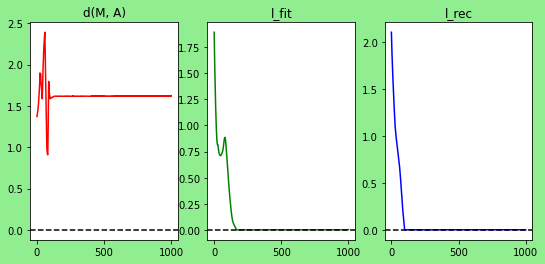

{'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 64, 'repetitions': 2, 'name': 'sweep-01'}


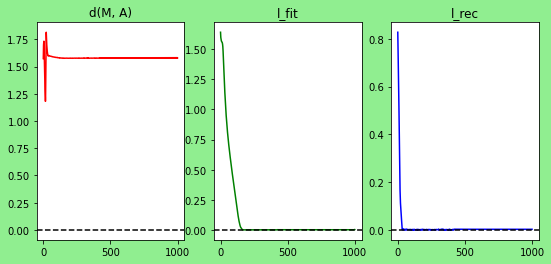

{'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 64, 'repetitions': 3, 'name': 'sweep-01'}


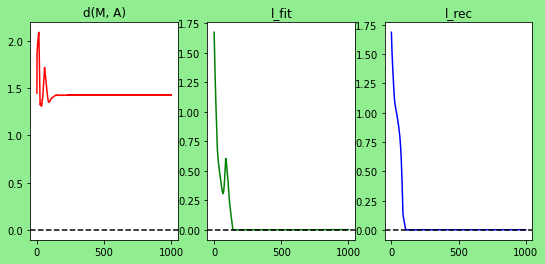

{'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 64, 'repetitions': 4, 'name': 'sweep-01'}


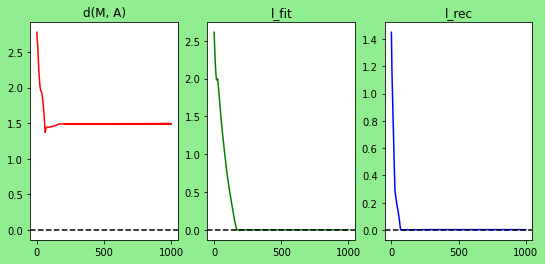

{'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-01'}


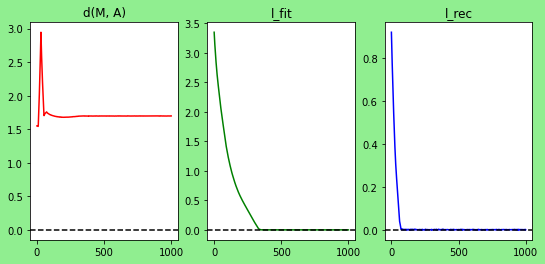

{'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-01'}


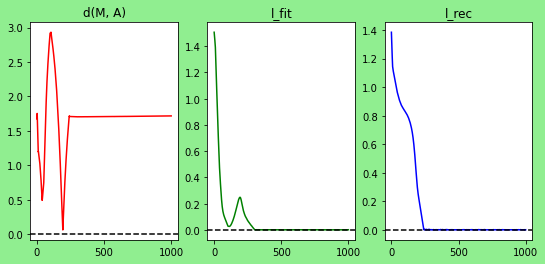

{'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-01'}


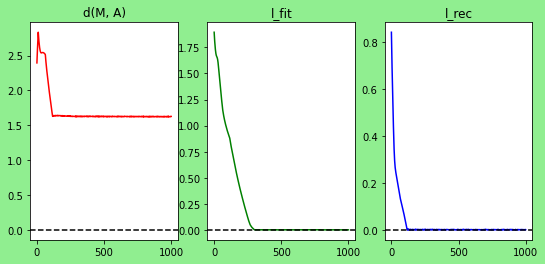

{'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-01'}


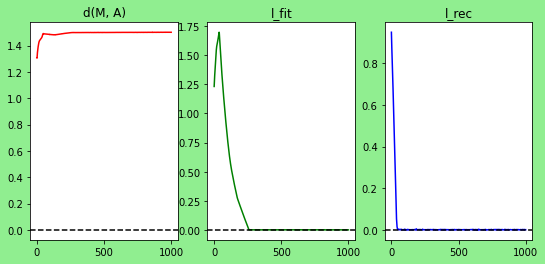

{'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-01'}


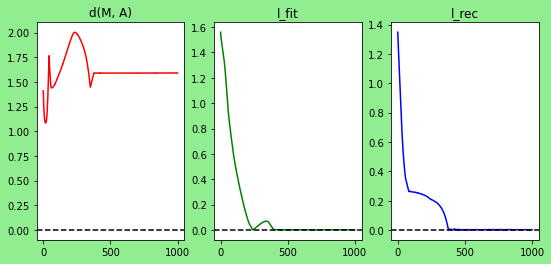

{'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 256, 'repetitions': 0, 'name': 'sweep-01'}


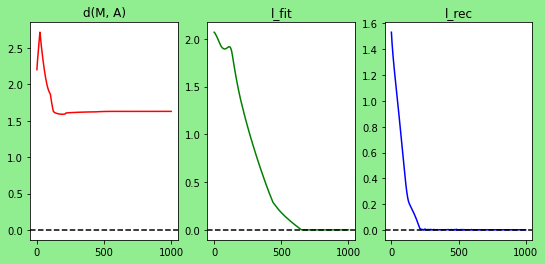

{'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 256, 'repetitions': 1, 'name': 'sweep-01'}


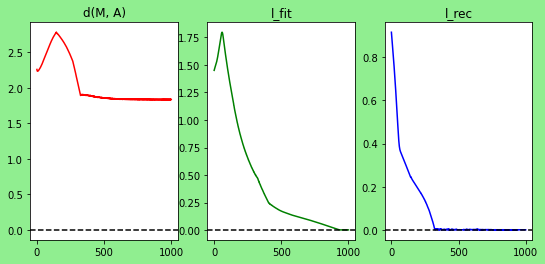

{'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 256, 'repetitions': 2, 'name': 'sweep-01'}


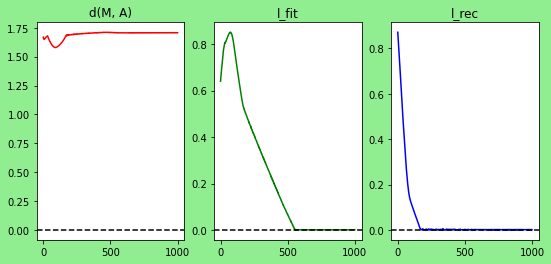

{'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 256, 'repetitions': 3, 'name': 'sweep-01'}


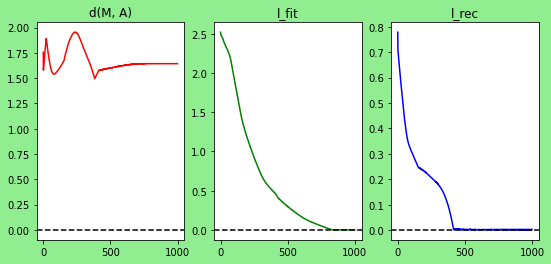

{'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 256, 'repetitions': 4, 'name': 'sweep-01'}


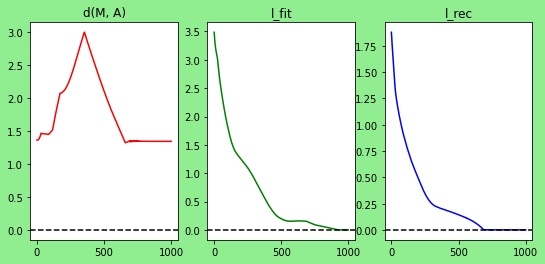

{'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 512, 'repetitions': 0, 'name': 'sweep-01'}


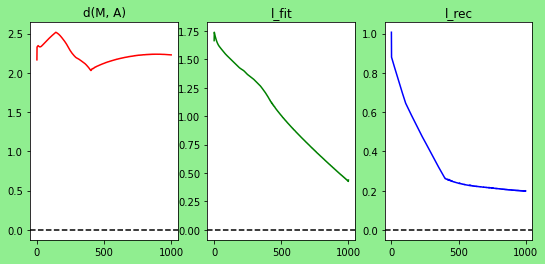

{'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 512, 'repetitions': 1, 'name': 'sweep-01'}


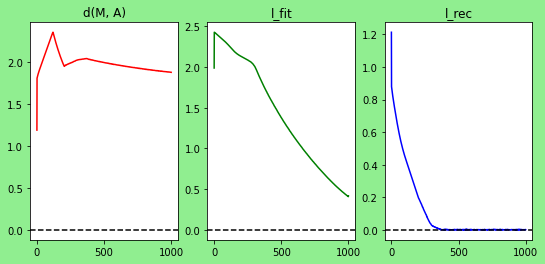

{'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 512, 'repetitions': 2, 'name': 'sweep-01'}


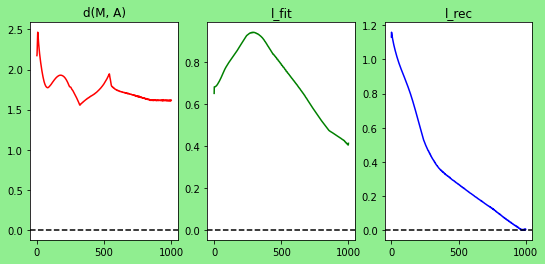

{'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 512, 'repetitions': 3, 'name': 'sweep-01'}


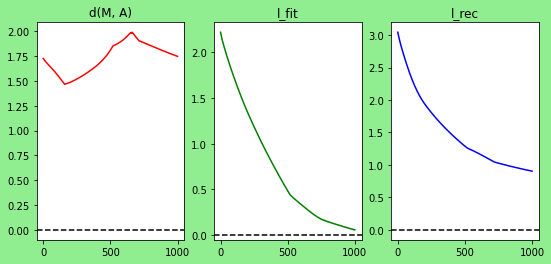

{'step.l_rec_coeff': 4.6415888336127775, 'get_results.batch_size': 512, 'repetitions': 4, 'name': 'sweep-01'}


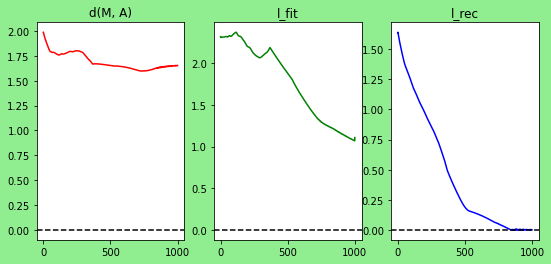

{'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 64, 'repetitions': 0, 'name': 'sweep-01'}


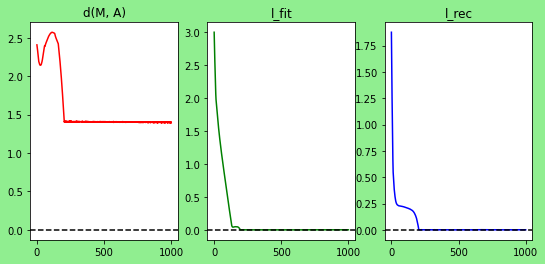

{'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 64, 'repetitions': 1, 'name': 'sweep-01'}


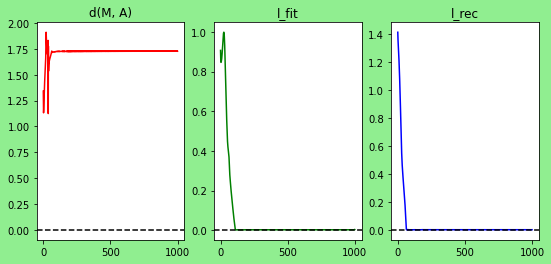

{'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 64, 'repetitions': 2, 'name': 'sweep-01'}


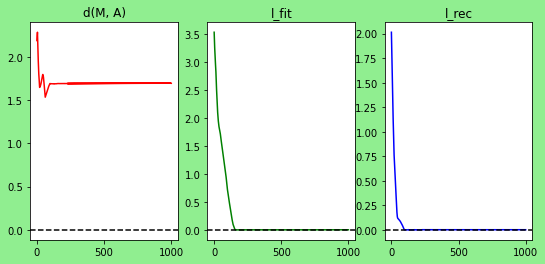

{'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 64, 'repetitions': 3, 'name': 'sweep-01'}


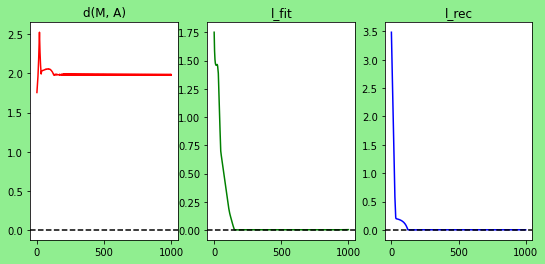

{'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 64, 'repetitions': 4, 'name': 'sweep-01'}


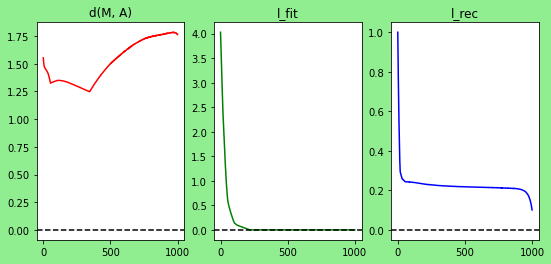

{'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-01'}


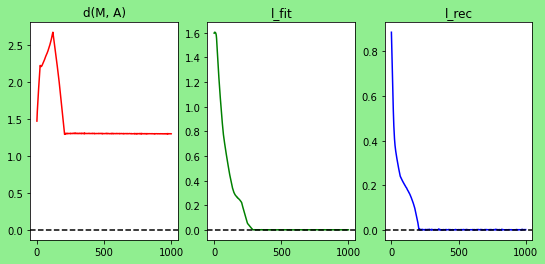

{'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-01'}


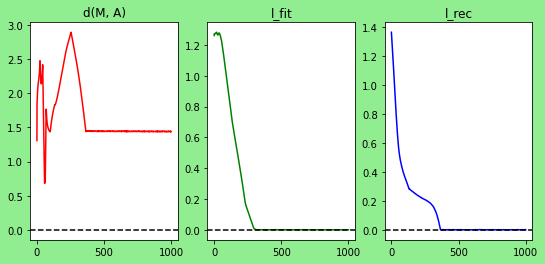

{'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-01'}


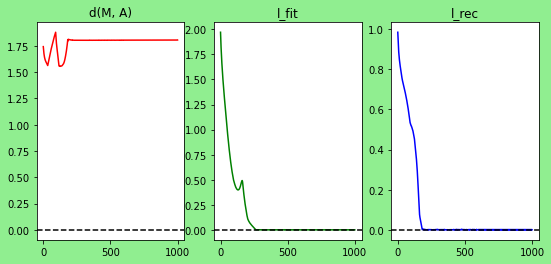

{'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-01'}


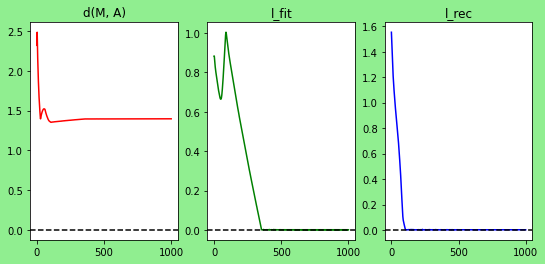

{'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-01'}


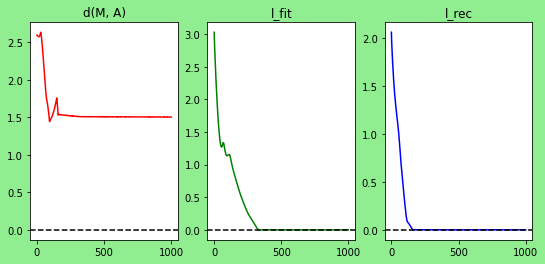

{'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 256, 'repetitions': 0, 'name': 'sweep-01'}


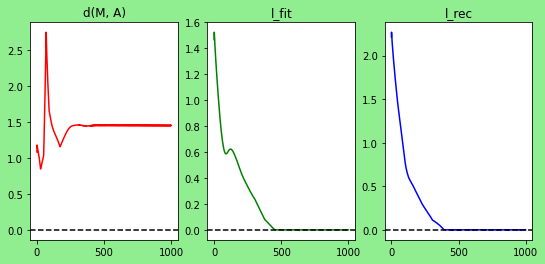

{'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 256, 'repetitions': 1, 'name': 'sweep-01'}


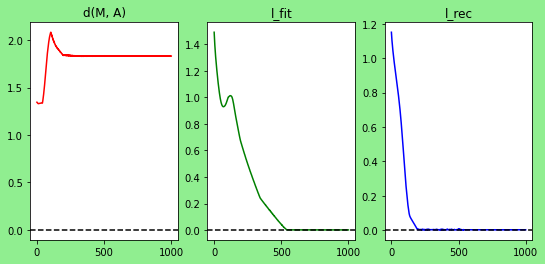

{'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 256, 'repetitions': 2, 'name': 'sweep-01'}


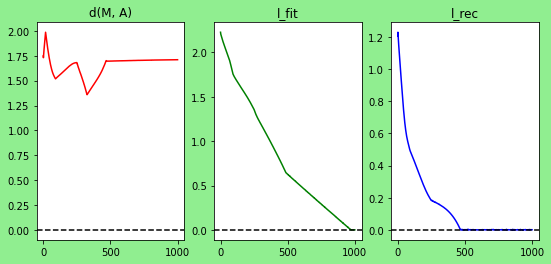

{'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 256, 'repetitions': 3, 'name': 'sweep-01'}


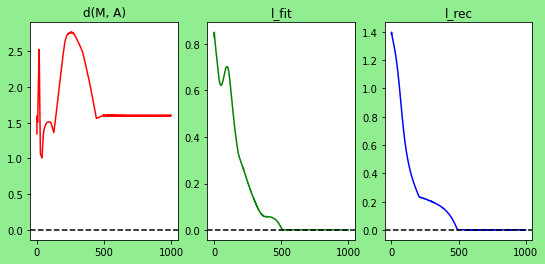

{'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 256, 'repetitions': 4, 'name': 'sweep-01'}


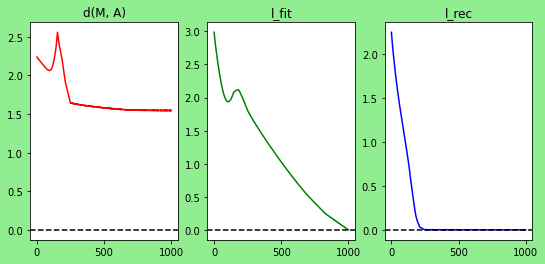

{'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 512, 'repetitions': 0, 'name': 'sweep-01'}


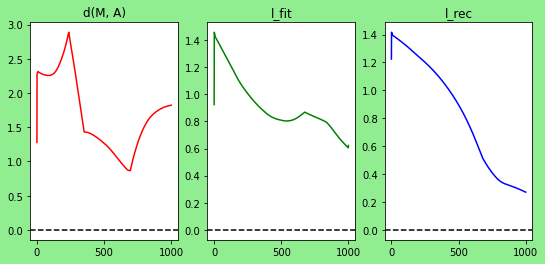

{'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 512, 'repetitions': 1, 'name': 'sweep-01'}


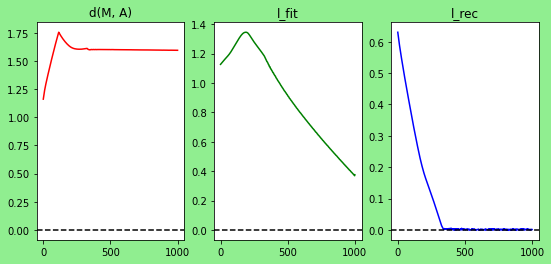

{'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 512, 'repetitions': 2, 'name': 'sweep-01'}


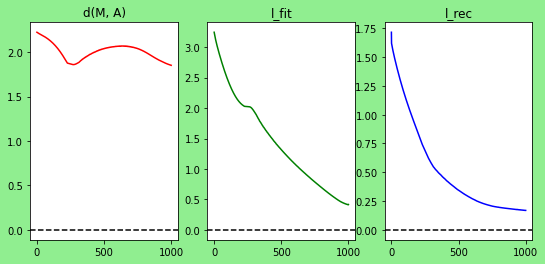

{'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 512, 'repetitions': 3, 'name': 'sweep-01'}


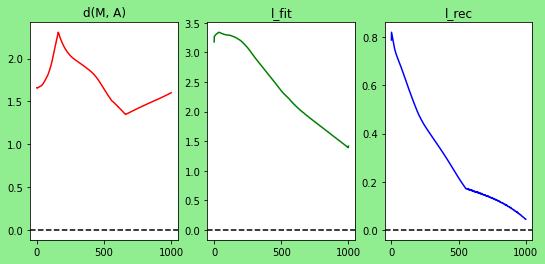

{'step.l_rec_coeff': 12.915496650148826, 'get_results.batch_size': 512, 'repetitions': 4, 'name': 'sweep-01'}


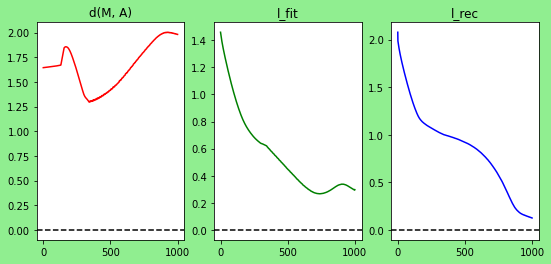

{'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 64, 'repetitions': 0, 'name': 'sweep-01'}


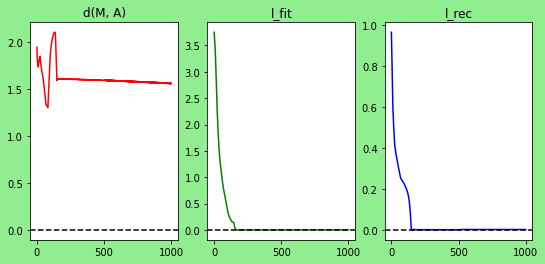

{'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 64, 'repetitions': 1, 'name': 'sweep-01'}


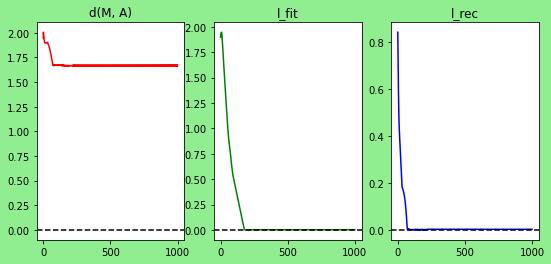

{'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 64, 'repetitions': 2, 'name': 'sweep-01'}


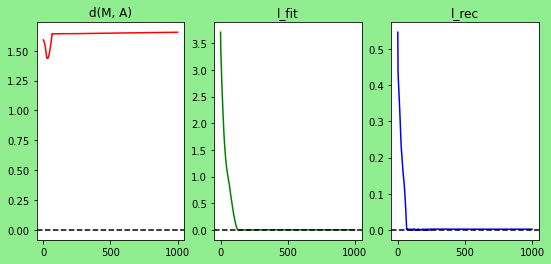

{'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 64, 'repetitions': 3, 'name': 'sweep-01'}


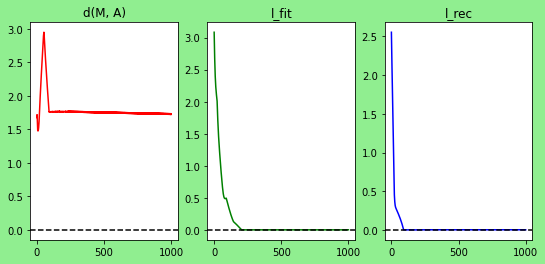

{'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 64, 'repetitions': 4, 'name': 'sweep-01'}


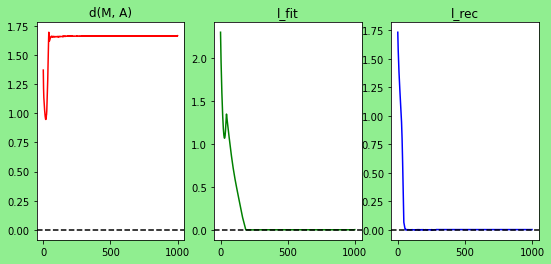

{'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-01'}


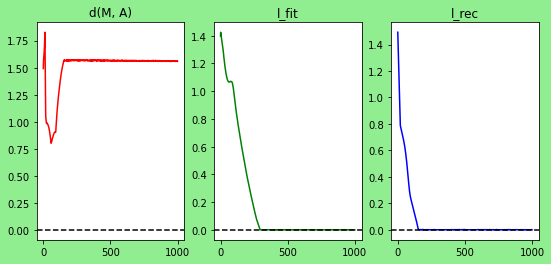

{'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-01'}


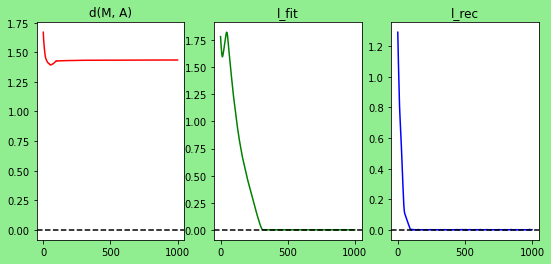

{'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-01'}


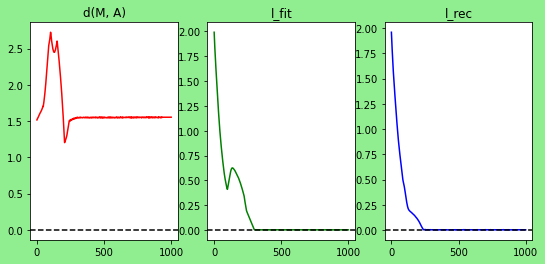

{'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-01'}


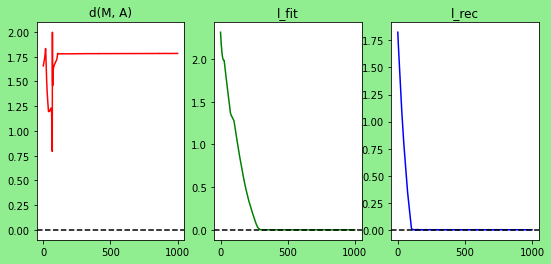

{'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-01'}


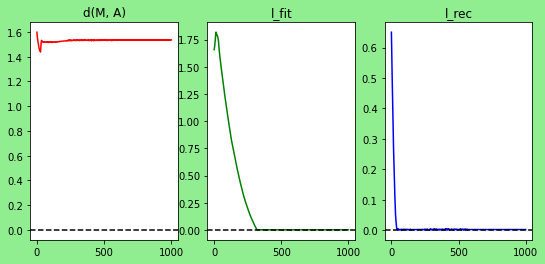

{'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 256, 'repetitions': 0, 'name': 'sweep-01'}


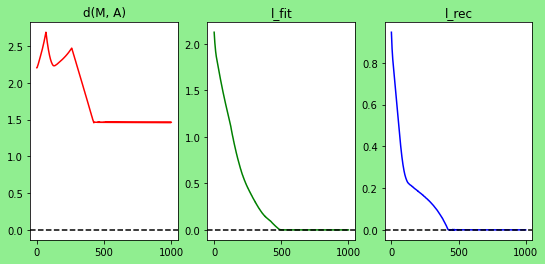

{'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 256, 'repetitions': 1, 'name': 'sweep-01'}


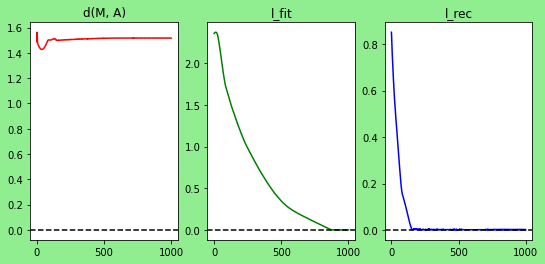

{'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 256, 'repetitions': 2, 'name': 'sweep-01'}


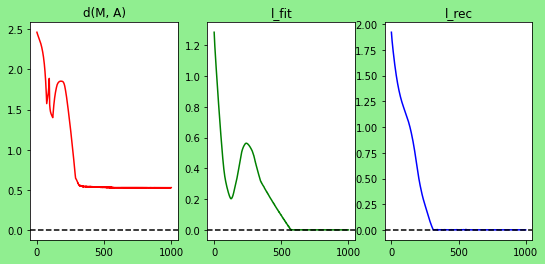

{'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 256, 'repetitions': 3, 'name': 'sweep-01'}


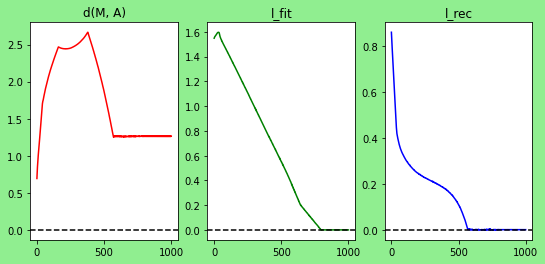

{'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 256, 'repetitions': 4, 'name': 'sweep-01'}


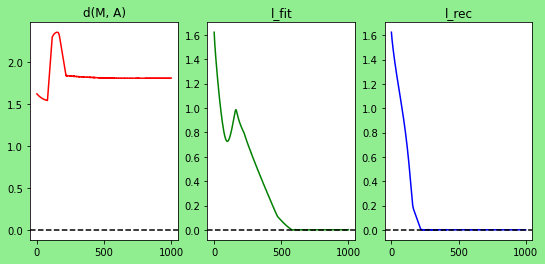

{'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 512, 'repetitions': 0, 'name': 'sweep-01'}


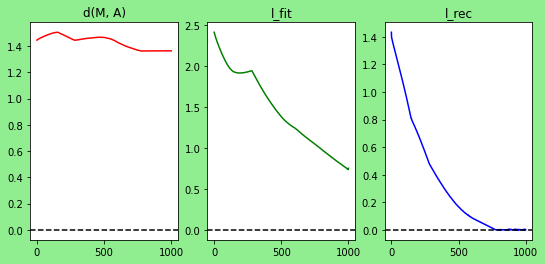

{'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 512, 'repetitions': 1, 'name': 'sweep-01'}


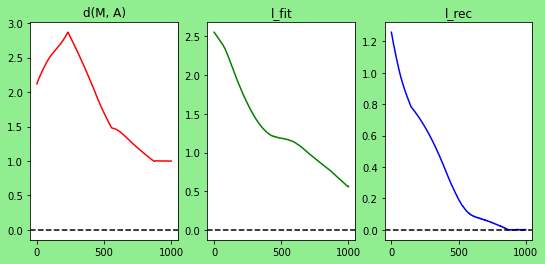

{'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 512, 'repetitions': 2, 'name': 'sweep-01'}


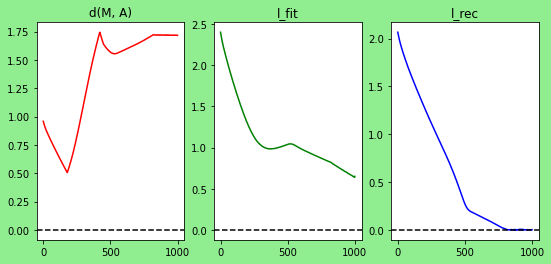

{'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 512, 'repetitions': 3, 'name': 'sweep-01'}


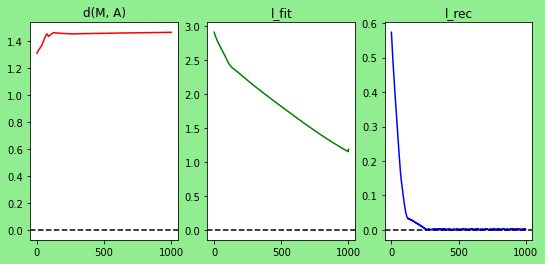

{'step.l_rec_coeff': 35.93813663804626, 'get_results.batch_size': 512, 'repetitions': 4, 'name': 'sweep-01'}


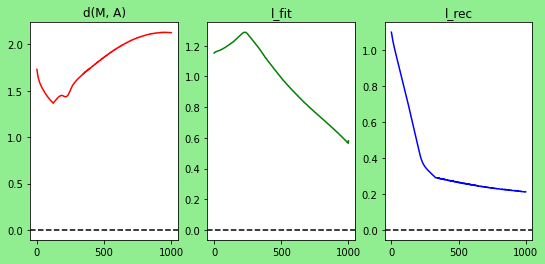

{'step.l_rec_coeff': 100.0, 'get_results.batch_size': 64, 'repetitions': 0, 'name': 'sweep-01'}


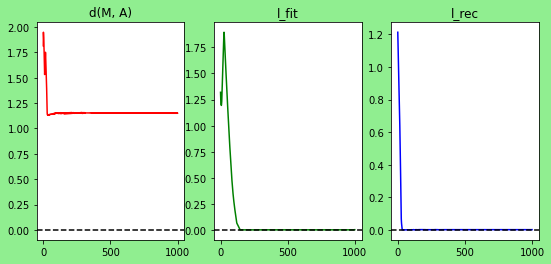

{'step.l_rec_coeff': 100.0, 'get_results.batch_size': 64, 'repetitions': 1, 'name': 'sweep-01'}


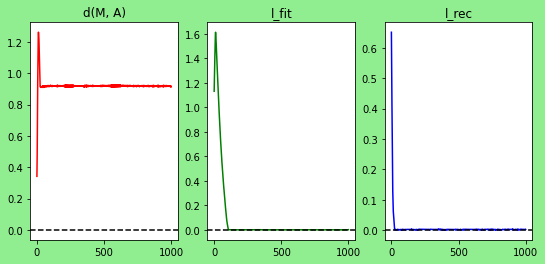

{'step.l_rec_coeff': 100.0, 'get_results.batch_size': 64, 'repetitions': 2, 'name': 'sweep-01'}


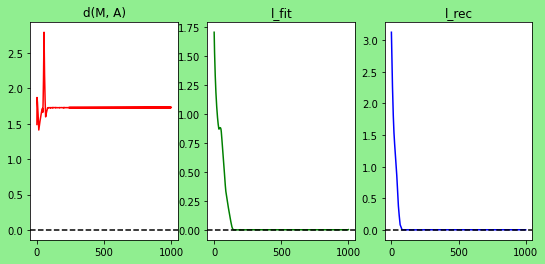

{'step.l_rec_coeff': 100.0, 'get_results.batch_size': 64, 'repetitions': 3, 'name': 'sweep-01'}


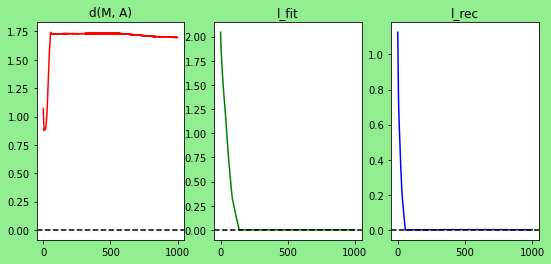

{'step.l_rec_coeff': 100.0, 'get_results.batch_size': 64, 'repetitions': 4, 'name': 'sweep-01'}


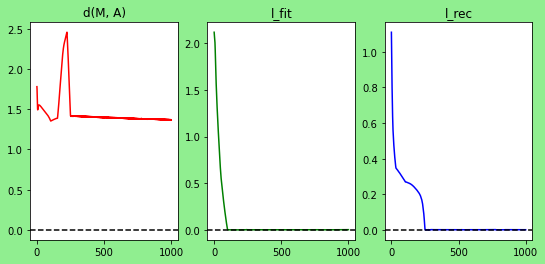

{'step.l_rec_coeff': 100.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-01'}


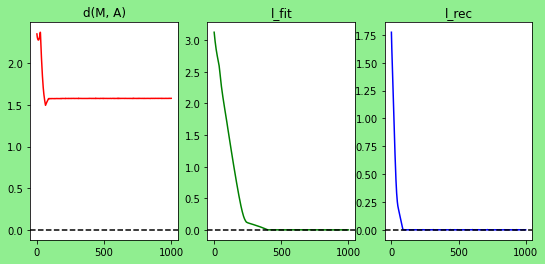

{'step.l_rec_coeff': 100.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-01'}


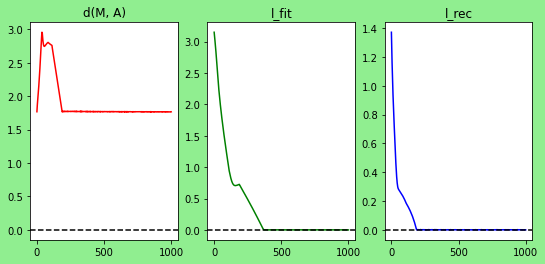

{'step.l_rec_coeff': 100.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-01'}


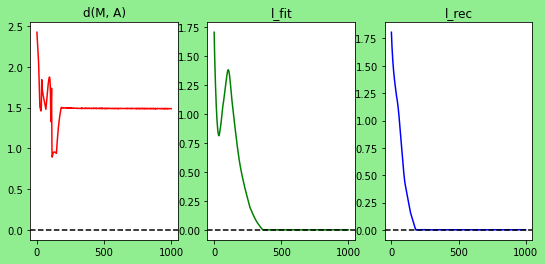

{'step.l_rec_coeff': 100.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-01'}


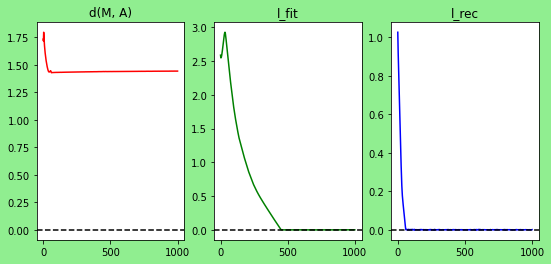

{'step.l_rec_coeff': 100.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-01'}


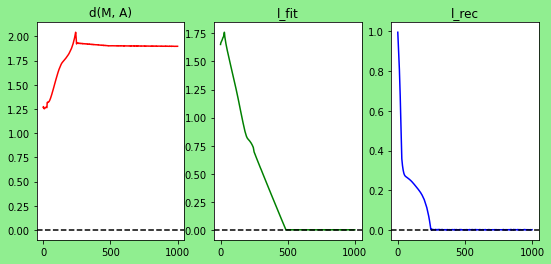

{'step.l_rec_coeff': 100.0, 'get_results.batch_size': 256, 'repetitions': 0, 'name': 'sweep-01'}


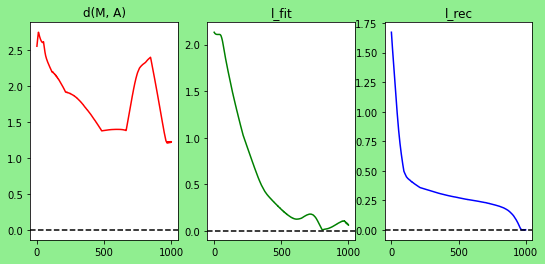

{'step.l_rec_coeff': 100.0, 'get_results.batch_size': 256, 'repetitions': 1, 'name': 'sweep-01'}


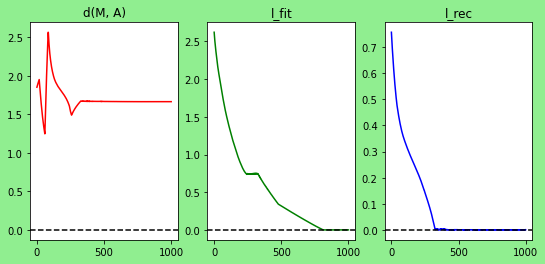

{'step.l_rec_coeff': 100.0, 'get_results.batch_size': 256, 'repetitions': 2, 'name': 'sweep-01'}


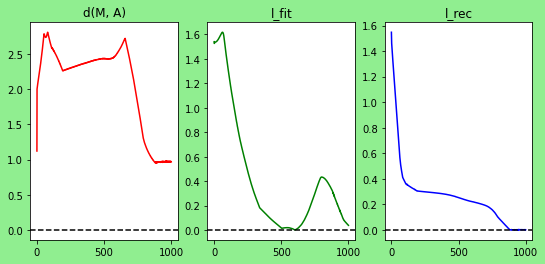

{'step.l_rec_coeff': 100.0, 'get_results.batch_size': 256, 'repetitions': 3, 'name': 'sweep-01'}


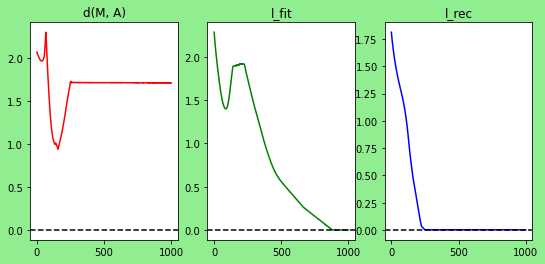

{'step.l_rec_coeff': 100.0, 'get_results.batch_size': 256, 'repetitions': 4, 'name': 'sweep-01'}


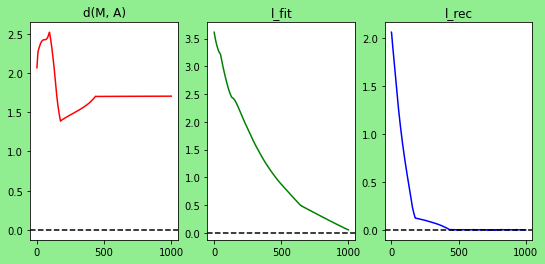

{'step.l_rec_coeff': 100.0, 'get_results.batch_size': 512, 'repetitions': 0, 'name': 'sweep-01'}


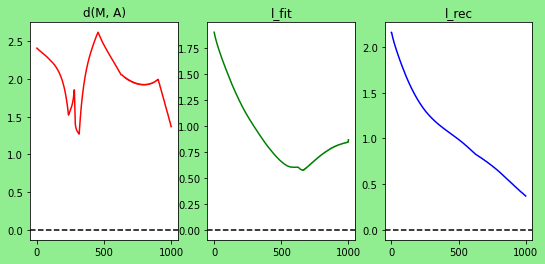

{'step.l_rec_coeff': 100.0, 'get_results.batch_size': 512, 'repetitions': 1, 'name': 'sweep-01'}


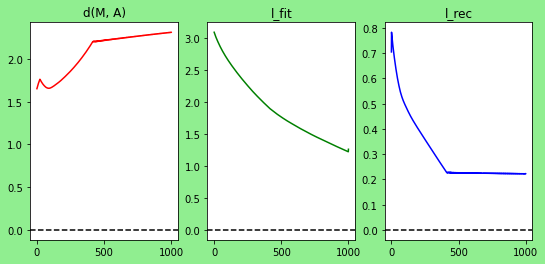

{'step.l_rec_coeff': 100.0, 'get_results.batch_size': 512, 'repetitions': 2, 'name': 'sweep-01'}


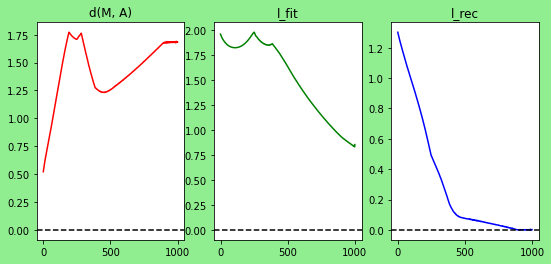

{'step.l_rec_coeff': 100.0, 'get_results.batch_size': 512, 'repetitions': 3, 'name': 'sweep-01'}


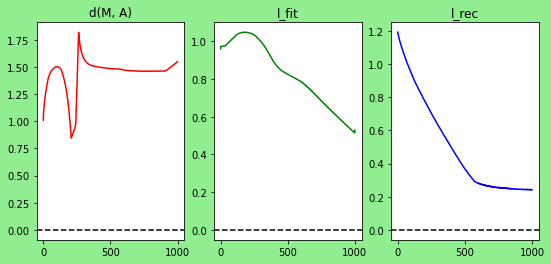

{'step.l_rec_coeff': 100.0, 'get_results.batch_size': 512, 'repetitions': 4, 'name': 'sweep-01'}


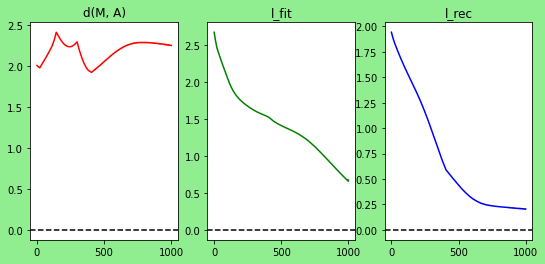

In [10]:
# show all results
for p, r in zip(all_params, results):
    process_results(r, str(p))

In [11]:
def quality_metric_last_l_fit(res):
    """Scalar quality metric: last fit loss."""
    #print(res)
    return res[1][0]['l_fit'][-1]

quality_metric_last_l_fit.title = "l_fit"

def quality_metric_last_l_rec(res):
    """Scalar quality metric: last rec loss."""
    #print(res)
    return res[1][0]['l_rec'][-1]

quality_metric_last_l_rec.title = "l_rec"

def quality_metric_combined(res):
    """Combined metric."""
    return max(quality_metric_last_l_fit(res), quality_metric_last_l_rec(res))
quality_metric_combined.title = "combined"

In [12]:
def plot_3d(metric):
    """Plot a metric in 3d."""
    # preparing data for the 3d plot
    X, Y, Z = [], [], []
    Xm, Ym, Zm = [], [], []
    Pm = []

    for p1 in sweep[param_1]:
        for p2 in sweep[param_2]:
            R = filter_results(**{param_1: p1, param_2: p2})
            for r in R:
                X.append(p1)
                Y.append(p2)
                Z.append(metric(r))
            Xm.append(p1)
            Ym.append(p2)
            Zm.append(np.median([metric(r) for r in R]))
            Pm.append((p1, p2))

    # Doing 3d plot

    # Configure the trace.
    trace1 = go.Mesh3d(x=Xm, y=Ym, z=Zm, opacity=0.5)

    # Configure the trace.
    trace2 = go.Scatter3d(x=X, y=Y, z=Z, opacity=0.5, mode='markers',
        marker={'size': 10, 'opacity': 0.8}
    )

    # Configure the layout.
    layout = go.Layout(
        margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
    )

    data = [trace1, trace2]

    plot_figure = go.Figure(data=data, layout=layout)

    plot_figure.update_layout(scene = dict(xaxis_title=param_1,
                        yaxis_title=param_2,
                        zaxis_title=metric.title,
                        xaxis_type="log", yaxis_type="log"),
                        width=700,
                        margin=dict(r=20, b=10, l=10, t=10))


    # Render the plot.
    plotly.offline.iplot(plot_figure)
    
    return Zm, Pm

In [13]:
Zm, Pm = plot_3d(quality_metric_last_l_rec)

In [14]:
idx = np.argmin(Zm)
P = Pm[idx]
print("%s=%.2f, %s=%.2f metric=%.2f" % (param_1, P[0], param_2, P[1], Zm[idx]))

step.l_rec_coeff=1.67, get_results.batch_size=256.00 metric=0.00


In [15]:
# best parameters
best_param_idx = all_params.index(filter_results(**{param_1: P[0], param_2: P[1]})[0][0])
best_param = all_params[best_param_idx]

# RESULTS

`sweep_00`: best hyperparams l_rec_coeff=1, batch_size=256
`sweep_01`: works OK if bs <= 200 and l_re >= 1

# Manual computation

In [16]:
import tensorflow as tf
tf.compat.v1.enable_v2_behavior()
from synthetic_experiment import *

1000/1000 [==============================] - 0s 40us/sample - loss: 0.0044
0.004364136677235365
[<tf.Variable 'sequential/dense/kernel:0' shape=(4, 2) dtype=float32, numpy=
array([[9.9652243e-01, 2.9473327e-04],
       [3.2169062e-03, 1.0002016e+00],
       [9.0663213e-01, 7.0672140e-05],
       [1.6374859e-03, 9.9648279e-01]], dtype=float32)>, <tf.Variable 'sequential/dense/bias:0' shape=(2,) dtype=float32, numpy=array([-0.00054833, -0.00013786], dtype=float32)>]
0.10578403896215605


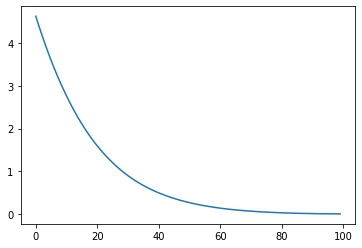

In [17]:
fit_test_model(xs, ys, A)

In [18]:
set_params(best_param)
best_param

{'step.l_rec_coeff': 1.6681005372000592,
 'get_results.batch_size': 256,
 'repetitions': 0,
 'name': 'sweep-01'}

In [19]:
# getting results manually
res = get_results(xs_e, ys_e, Q1)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



best


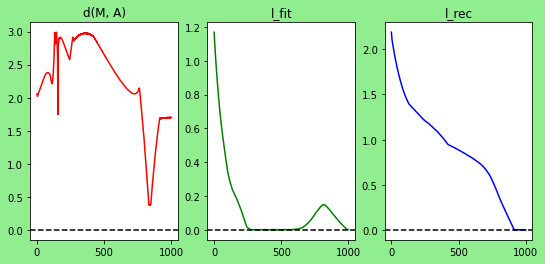

In [20]:
process_results(res, "best")

In [21]:
pickle.dump(results, open('results_%s.pkl' % sweep['name'][0], 'wb'))